# Micro-Credit Defaulter Model Project:

**STATEMENT: A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.**

**Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.**

**Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients**.

**We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.**

**They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.**

**They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).**

**The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.** 

**NOTE: Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.**


### import packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.classifier import StackingClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
from collections import Counter
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
import copy
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import joblib

### import dataset

In [2]:
pd.set_option('max_columns', None)
df=pd.read_csv('Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


### Remove extra column Unnamed: 0

In [3]:
df=df.drop('Unnamed: 0',axis=1)
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


### Print description of columns for better understanding

In [4]:
df_desp=pd.read_csv('Description.csv')
df_desp

,Variable,Definition,Comment
0,label,Flag indicating whether the user paid back the...,NaN
1,msisdn,mobile number of user,NaN
2,aon,age on cellular network in days,NaN
3,daily_decr30,"Daily amount spent from main account, averaged...",NaN
4,daily_decr90,"Daily amount spent from main account, averaged...",NaN
5,rental30,Average main account balance over last 30 days,Unsure of given definition
6,rental90,Average main account balance over last 90 days,Unsure of given definition
7,last_rech_date_ma,Number of days till last recharge of main account,NaN
8,last_rech_date_da,Number of days till last recharge of data account,NaN
9,last_rech_amt_ma,Amount of last recharge of main account (in In...,NaN


In [5]:
df.pcircle.unique()

array(['UPW'], dtype=object)

In [6]:
df=df.drop(['pcircle'],axis=1)
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [7]:
df=df.drop(['msisdn'],axis=1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [8]:
df['pdate'] =  pd.to_datetime(df['pdate'])
df["pyear"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year
df["pmonth"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month
df["pday"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day
df = df.drop(["pdate"],axis=1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pyear,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016,7,25


In [9]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (209593, 36)


In [10]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [11]:
print('Number of label no are:',df['label'].value_counts()[0])
print('Number of label yes are:',df['label'].value_counts()[1])
print('Unbalanced dataset' if df['label'].value_counts()[0]!=df['label'].value_counts()[1] else 'Balanced dataset')

Number of label no are: 26162
Number of label yes are: 183431
Unbalanced dataset


Text(0.5, 1.0, 'label No  vs Yes')

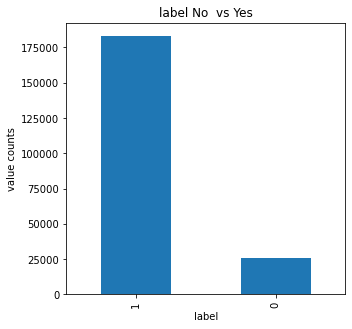

In [12]:
plt.figure(figsize=[5,5])
df['label'].value_counts().plot(kind='bar')
plt.xlabel("label")
plt.ylabel('value counts')
plt.title('label No  vs Yes')

In [13]:
dfmin=df[df['label']==0]
dfmax=df[df['label']==1]
dfminup=resample(dfmin,replace=True,n_samples=183431,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of label no are:',dff['label'].value_counts()[0])
print('Number of label yes are:',dff['label'].value_counts()[1])
print('Unbalanced dataset' if dff['label'].value_counts()[0]!=dff['label'].value_counts()[1] else 'Balanced dataset')

Number of label no are: 183431
Number of label yes are: 183431
Balanced dataset


Text(0.5, 1.0, 'label No  vs Yes')

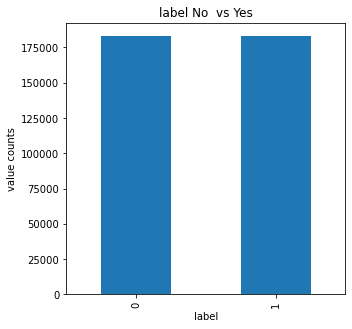

In [14]:
plt.figure(figsize=[5,5])
dff['label'].value_counts().plot(kind='bar')
plt.xlabel("label")
plt.ylabel('value counts')
plt.title('label No  vs Yes')

In [15]:
print('Number of rows x columns in dataset are:',dff.shape)

Number of rows x columns in dataset are: (366862, 36)


### Search for best features along with their correlation

In [16]:
dff.corr()['label']

label                   1.000000
aon                    -0.006379
daily_decr30            0.311855
daily_decr90            0.311274
rental30                0.094148
rental90                0.127138
last_rech_date_ma       0.004870
last_rech_date_da       0.001601
last_rech_amt_ma        0.207995
cnt_ma_rech30           0.410761
fr_ma_rech30            0.003082
sumamnt_ma_rech30       0.361346
medianamnt_ma_rech30    0.223424
medianmarechprebal30   -0.007019
cnt_ma_rech90           0.417725
fr_ma_rech90            0.131594
sumamnt_ma_rech90       0.371750
medianamnt_ma_rech90    0.186125
medianmarechprebal90    0.054566
cnt_da_rech30           0.004238
fr_da_rech30           -0.000123
cnt_da_rech90           0.005403
fr_da_rech90           -0.006525
cnt_loans30             0.350547
amnt_loans30            0.353393
maxamnt_loans30         0.000991
medianamnt_loans30      0.076339
cnt_loans90             0.007876
amnt_loans90            0.363279
maxamnt_loans90         0.149644
medianamnt

<AxesSubplot:>

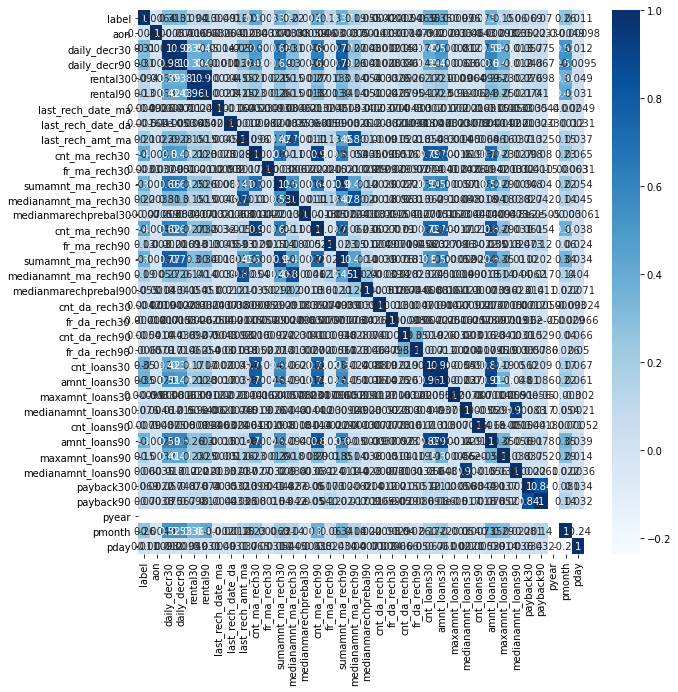

In [17]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True,cmap='Blues')

### check value_counts of whole data to see if there is a problm of skewness

In [18]:
for i in dff.columns:
    print('*'*10)
    print(i)
    print(dff[i].value_counts())

**********
label
0    183431
1    183431
Name: label, dtype: int64
**********
aon
99.000000        851
100.000000       817
92.000000        788
94.000000        786
98.000000        779
                ... 
799036.722747      1
852354.494855      1
534465.494798      1
610151.284491      1
840165.606118      1
Name: aon, Length: 4507, dtype: int64
**********
daily_decr30
0.000000        26150
500.000000       4125
1000.000000      2182
700.000000       1496
600.000000       1268
                ...  
11736.934667        1
56.905333           1
3861.624667         1
8472.312000         1
30.360000           1
Name: daily_decr30, Length: 147022, dtype: int64
**********
daily_decr90
0.00        26069
500.00       4077
1000.00      2107
700.00       1458
600.00       1230
            ...  
26044.40        1
10183.50        1
16601.00        1
5023.74         1
30525.39        1
Name: daily_decr90, Length: 158667, dtype: int64
**********
rental30
0.00        29787
99.56        2007
200.13 

### columns such as  last_rech_date_da,cnt_da_rech30,fr_da_rech30,cnt_da_rech90, fr_da_rech90, medianamnt_loans30, medianamnt_loans90   contain more than 90% 0 in their data, which will generate skewness, hence drop them
### columns such as maxamnt_loans90,maxamnt_loans30 has more than 90% data biased towards one datapt, hence drop them
### column pyear contains only value 2016 hence drop it
### apart from that we can also see there are some negative values in some columns examples medianmarechprebal90, rental30 use describe func to analyze properly

In [19]:
dff=dff.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30',
           'medianamnt_loans90','pyear','maxamnt_loans90','maxamnt_loans30'],axis=1)
dff

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth,pday
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,1.0,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,1.0,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,2.0,12,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,7.0,42,2.333333,2.333333,6,22
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,3,18,3.0,18,11.000000,8.333333,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137318,0,336.0,800.000000,800.000000,4365.08,5025.88,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,1,6,1.0,6,0.000000,0.000000,7,10
18870,0,390.0,787.450000,794.900000,1499.50,1682.05,7.0,770,1,0.0,770.0,770.0,15.00,2,40,2317,1158.5,209.00,1,6,2.0,12,0.000000,0.000000,7,15
201416,0,331.0,1040.000000,1040.000000,5769.55,6043.46,72.0,1547,0,0.0,0.0,0.0,0.00,1,0,1547,1547.0,7.00,1,6,1.0,6,0.000000,0.000000,7,7
88348,0,244.0,13.000000,13.000000,60.00,60.00,15.0,1539,1,0.0,1539.0,1539.0,95.00,1,0,1539,1539.0,95.00,2,12,2.0,12,0.000000,0.000000,6,30


In [20]:
dff.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth,pday
count,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.000000,366862.00000
mean,0.500000,8499.628789,3616.610693,4019.955115,2403.588683,2983.933776,3576.181481,1707.527844,2.829557,3602.901010,5361.213628,1476.523261,4148.536467,4.386055,6.496797,8453.473426,1575.970418,74.678241,2.190039,14.063419,17.180749,17.656465,2.918681,3.750926,6.667019,14.33436
std,0.500001,77678.013689,7538.280044,8827.253660,4073.433896,5223.072178,52473.497688,2283.393032,3.724733,52363.603997,8634.334449,2000.467076,56292.656021,6.156150,12.319852,14130.269557,2061.187452,418.344405,2.163196,14.667606,221.165520,21.983450,9.309587,10.824700,0.666218,8.13105
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,0.000000,209.000000,12.400000,12.650000,169.040000,182.700000,1.000000,770.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,773.000000,770.000000,0.800000,1.000000,6.000000,1.000000,6.000000,0.000000,0.000000,6.000000,8.00000
50%,0.500000,471.000000,518.900000,525.280000,876.960000,1026.600000,3.000000,777.000000,2.000000,0.000000,2312.000000,773.000000,21.830000,2.000000,1.000000,3470.000000,947.000000,25.000000,1.000000,6.000000,1.000000,6.000000,0.000000,0.000000,7.000000,14.00000
75%,1.000000,916.000000,3835.504000,3950.000000,2866.327500,3511.652500,8.000000,1547.000000,4.000000,4.000000,6951.000000,1539.000000,63.500000,6.000000,6.000000,10316.000000,1547.000000,64.000000,3.000000,18.000000,3.000000,18.000000,2.666667,3.454545,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,4997.517944,438.000000,171.500000,171.500000,8.000000,31.00000


### columns aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, medianmarechprebal30, medianmarechprebal90 have negative values in dataset
### acc to their description given above we know that they cannot have negative values hence conv them into positive by using abs func

In [21]:
dff['aon']=abs(dff['aon'])
dff['daily_decr30']=abs(dff['daily_decr30'])
dff['daily_decr90']=abs(dff['daily_decr90'])
dff['rental30']=abs(dff['rental30'])
dff['rental90']=abs(dff['rental90'])
dff['last_rech_date_ma']=abs(dff['last_rech_date_ma'])
dff['medianmarechprebal30']=abs(dff['medianmarechprebal30'])
dff['medianmarechprebal90']=abs(dff['medianmarechprebal90'])

In [22]:
listy=list(dff.columns)
listy.remove('label')
listy

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90',
 'pmonth',
 'pday']

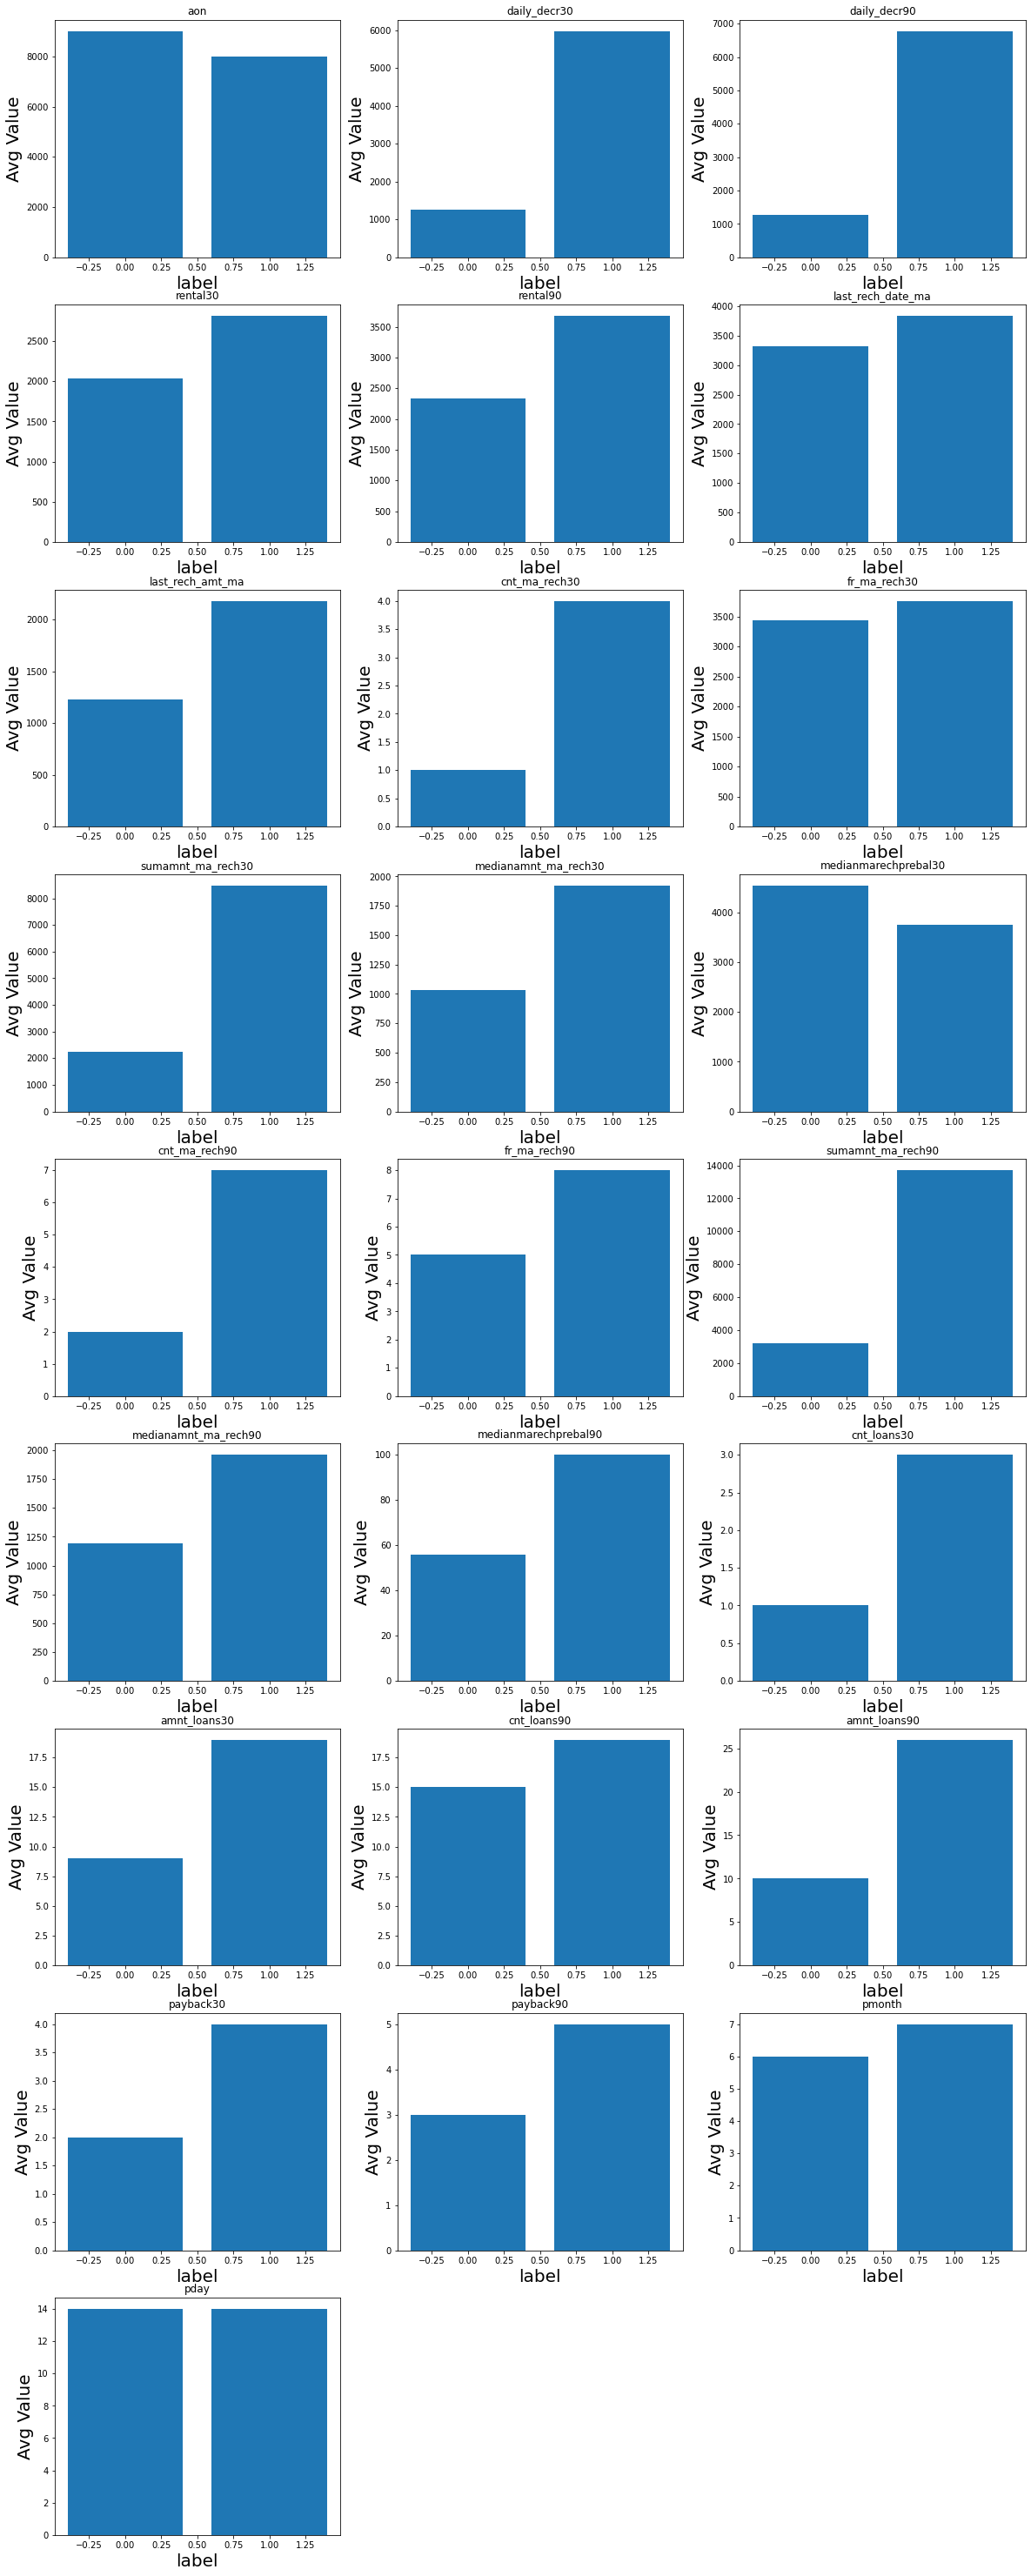

In [23]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for i in listy:
    y0=round(dff[dff['label']==0][i].mean())
    y1=round(dff[dff['label']==1][i].mean())
    ax=plt.subplot(50,3,plotnumber)
    plt.bar([0,1],[y0,y1])
    plt.xlabel('label',fontsize=20)
    plt.ylabel('Avg Value',fontsize=20)
    plt.title(i)
    plotnumber+=1
plt.show()

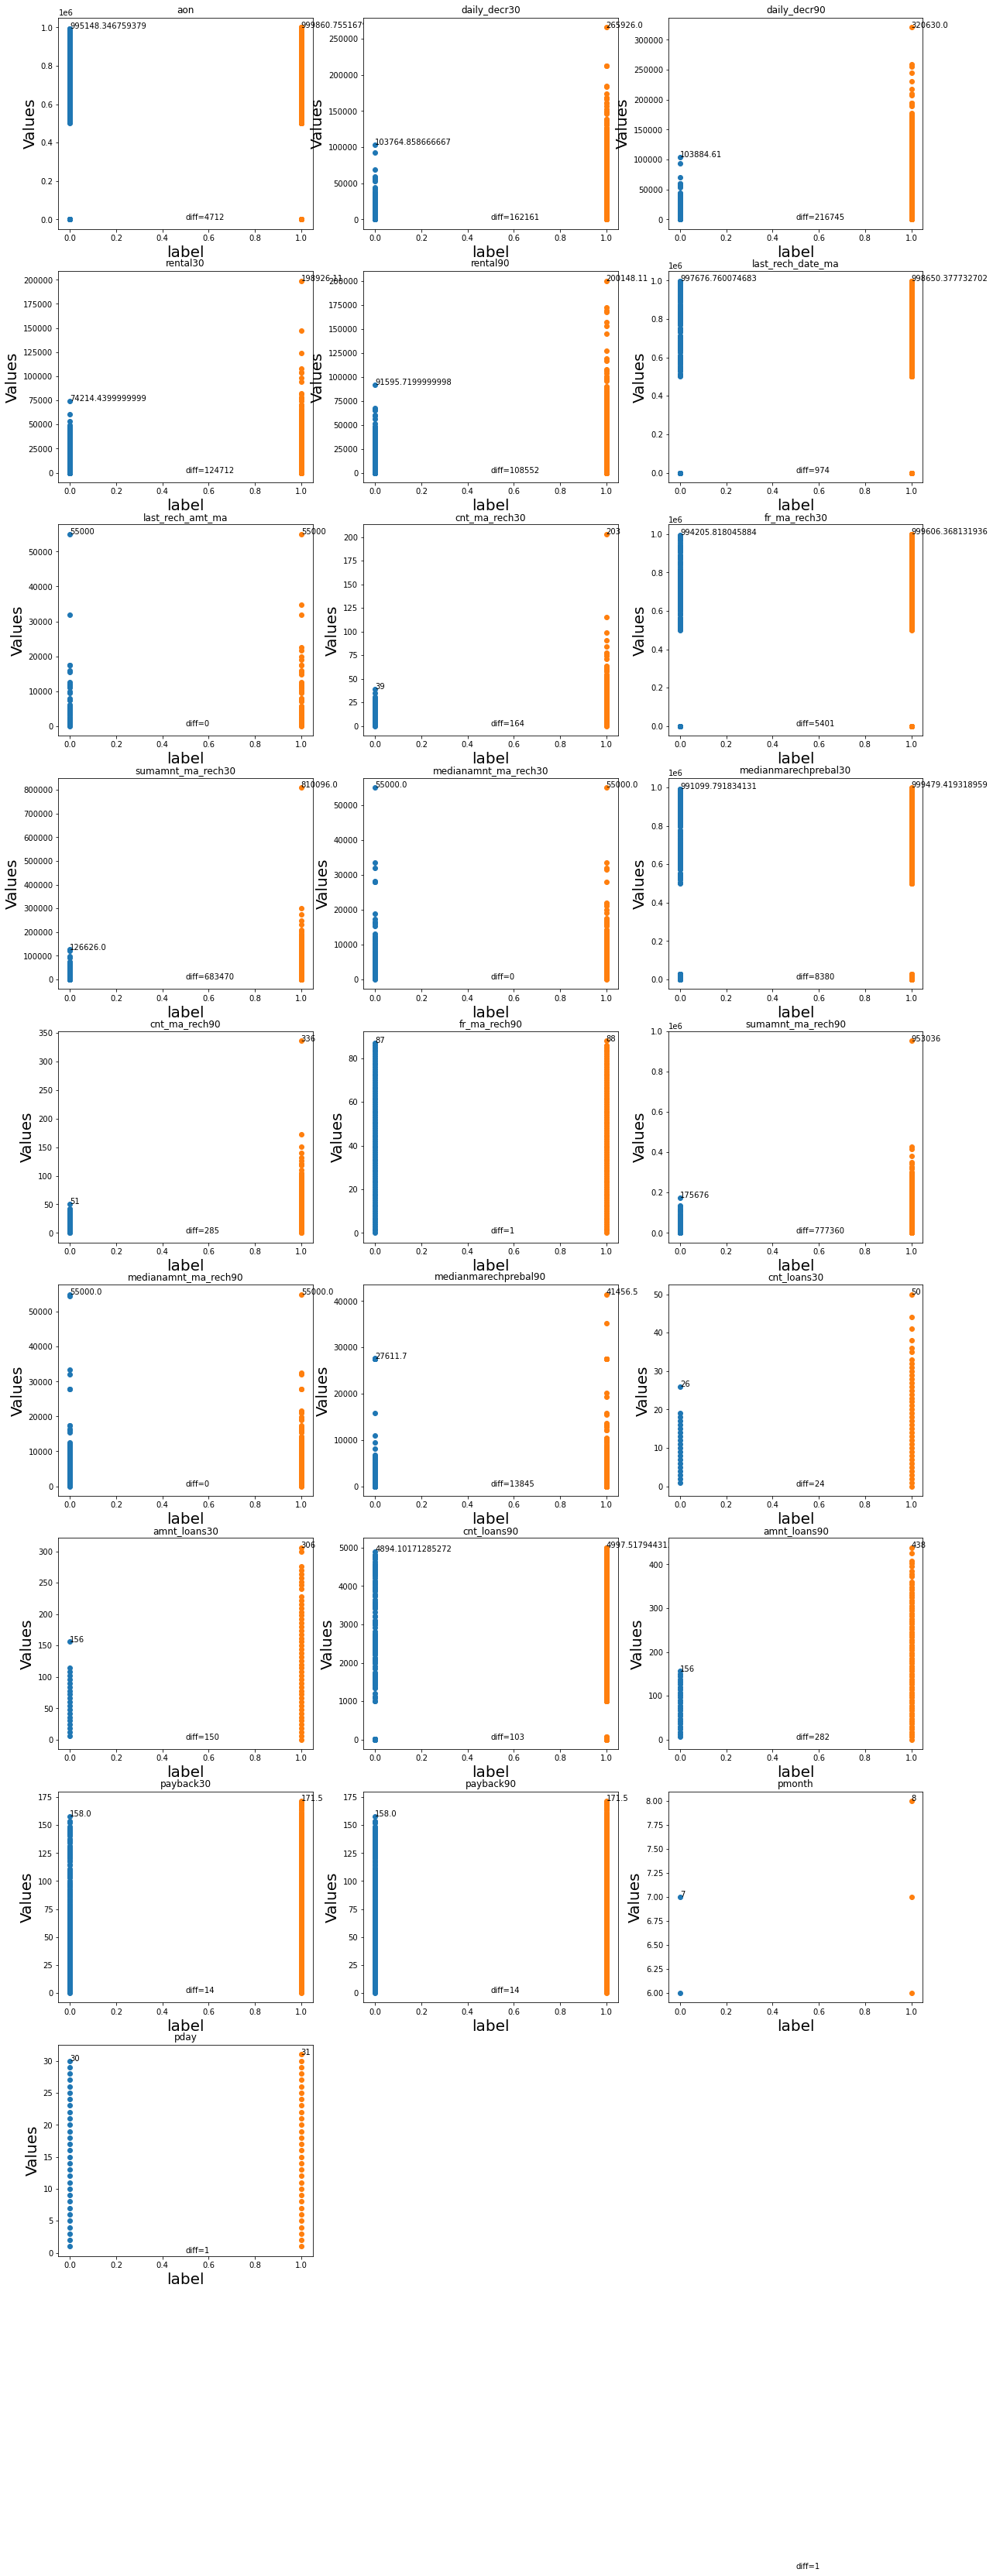

In [24]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for i in listy:
    y0=dff[dff['label']==0][i].value_counts().index.tolist()
    y1=dff[dff['label']==1][i].value_counts().index.tolist()
    ax=plt.subplot(50,3,plotnumber)
    plt.scatter([0 for i in range(len(y0))],y0)
    plt.scatter([1 for i in range(len(y1))],y1)
    plt.text(0,max(y0),max(y0))
    plt.text(1,max(y1),max(y1))
    plt.text(0.5,0,'diff='+str(round(max(y1)-max(y0))))
    plt.xlabel('label',fontsize=20)
    plt.ylabel('Values',fontsize=20)
    plt.title(i)
    plotnumber+=1
plt.show()

### drop pday as datawaise there is no significant distinct gap between label 0 and label 1. this might hinder our model performance (conclusion derived by observing above both graphs)

In [25]:
dff=dff.drop(['pday'],axis=1)
dff

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,1.0,12,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,1.0,6,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,2.0,12,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,7.0,42,2.333333,2.333333,6
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,3,18,3.0,18,11.000000,8.333333,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137318,0,336.0,800.000000,800.000000,4365.08,5025.88,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,1,6,1.0,6,0.000000,0.000000,7
18870,0,390.0,787.450000,794.900000,1499.50,1682.05,7.0,770,1,0.0,770.0,770.0,15.00,2,40,2317,1158.5,209.00,1,6,2.0,12,0.000000,0.000000,7
201416,0,331.0,1040.000000,1040.000000,5769.55,6043.46,72.0,1547,0,0.0,0.0,0.0,0.00,1,0,1547,1547.0,7.00,1,6,1.0,6,0.000000,0.000000,7
88348,0,244.0,13.000000,13.000000,60.00,60.00,15.0,1539,1,0.0,1539.0,1539.0,95.00,1,0,1539,1539.0,95.00,2,12,2.0,12,0.000000,0.000000,6


In [26]:
listy.remove('pday')

### as the case study is of peps who took loan, so we shall remove remove peps who never took a loan

In [27]:
dff[dff['amnt_loans90']==0]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth
127,1,111.0,1820.0,2221.40,1068.68,1520.18,24.0,770,1,0.0,770.0,770.0,23.00,3,4,2310,770.0,13.00,0,0,0.0,0,0.0,0.0,8
149,1,634.0,8977.0,21762.43,2056.08,2421.32,20.0,770,1,0.0,770.0,770.0,140.90,1,0,770,770.0,140.90,0,0,0.0,0,0.0,0.0,8
187,1,422.0,13601.0,16400.20,1843.27,2847.50,1.0,8000,3,1.0,13587.0,4048.0,371.00,5,36,19182,4048.0,412.00,0,0,0.0,0,0.0,0.0,8
212,1,879.0,45729.5,45729.50,7464.54,7464.54,1.0,7526,9,2.0,40879.0,5787.0,4698.00,9,2,40879,5787.0,4698.00,0,0,0.0,0,55.0,55.0,8
262,1,94.0,2700.0,2757.79,200.13,260.13,25.0,1539,1,0.0,1539.0,1539.0,26.00,3,11,6271,1539.0,26.00,0,0,0.0,0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209337,1,843.0,6309.0,6694.81,4182.61,4585.51,38.0,7526,0,0.0,0.0,0.0,0.00,1,0,7526,7526.0,9.00,0,0,0.0,0,0.0,0.0,7
209343,1,766.0,12550.0,12792.85,1312.93,1000.03,12.0,8000,2,4.0,12048.0,6024.0,231.04,3,25,20048,8000.0,34.54,0,0,0.0,0,0.0,0.0,7
209401,1,873.0,3350.0,3510.21,1504.48,1504.48,3.0,1539,1,0.0,1539.0,1539.0,0.00,1,0,1539,1539.0,0.00,0,0,0.0,0,0.0,0.0,8
209406,1,268.0,10322.0,10322.00,2464.86,7161.06,5.0,3178,4,0.0,7026.0,1539.0,73.00,4,0,7026,1539.0,73.00,0,0,0.0,0,0.0,0.0,8


### 2k peps never took loan eliminate them from case study

In [28]:
dff=dff[dff['amnt_loans90']!=0]
dff

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,1.0,12,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,1.0,6,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,2.0,12,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,7.0,42,2.333333,2.333333,6
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,3,18,3.0,18,11.000000,8.333333,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137318,0,336.0,800.000000,800.000000,4365.08,5025.88,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,1,6,1.0,6,0.000000,0.000000,7
18870,0,390.0,787.450000,794.900000,1499.50,1682.05,7.0,770,1,0.0,770.0,770.0,15.00,2,40,2317,1158.5,209.00,1,6,2.0,12,0.000000,0.000000,7
201416,0,331.0,1040.000000,1040.000000,5769.55,6043.46,72.0,1547,0,0.0,0.0,0.0,0.00,1,0,1547,1547.0,7.00,1,6,1.0,6,0.000000,0.000000,7
88348,0,244.0,13.000000,13.000000,60.00,60.00,15.0,1539,1,0.0,1539.0,1539.0,95.00,1,0,1539,1539.0,95.00,2,12,2.0,12,0.000000,0.000000,6


### Now dataset is well prepd 
### start visualization

### Univariate Analysis:

### dist plot of all numerical columns
### (there are some categorical columns but due to large range of datapts i will use them as a non categoorical data)

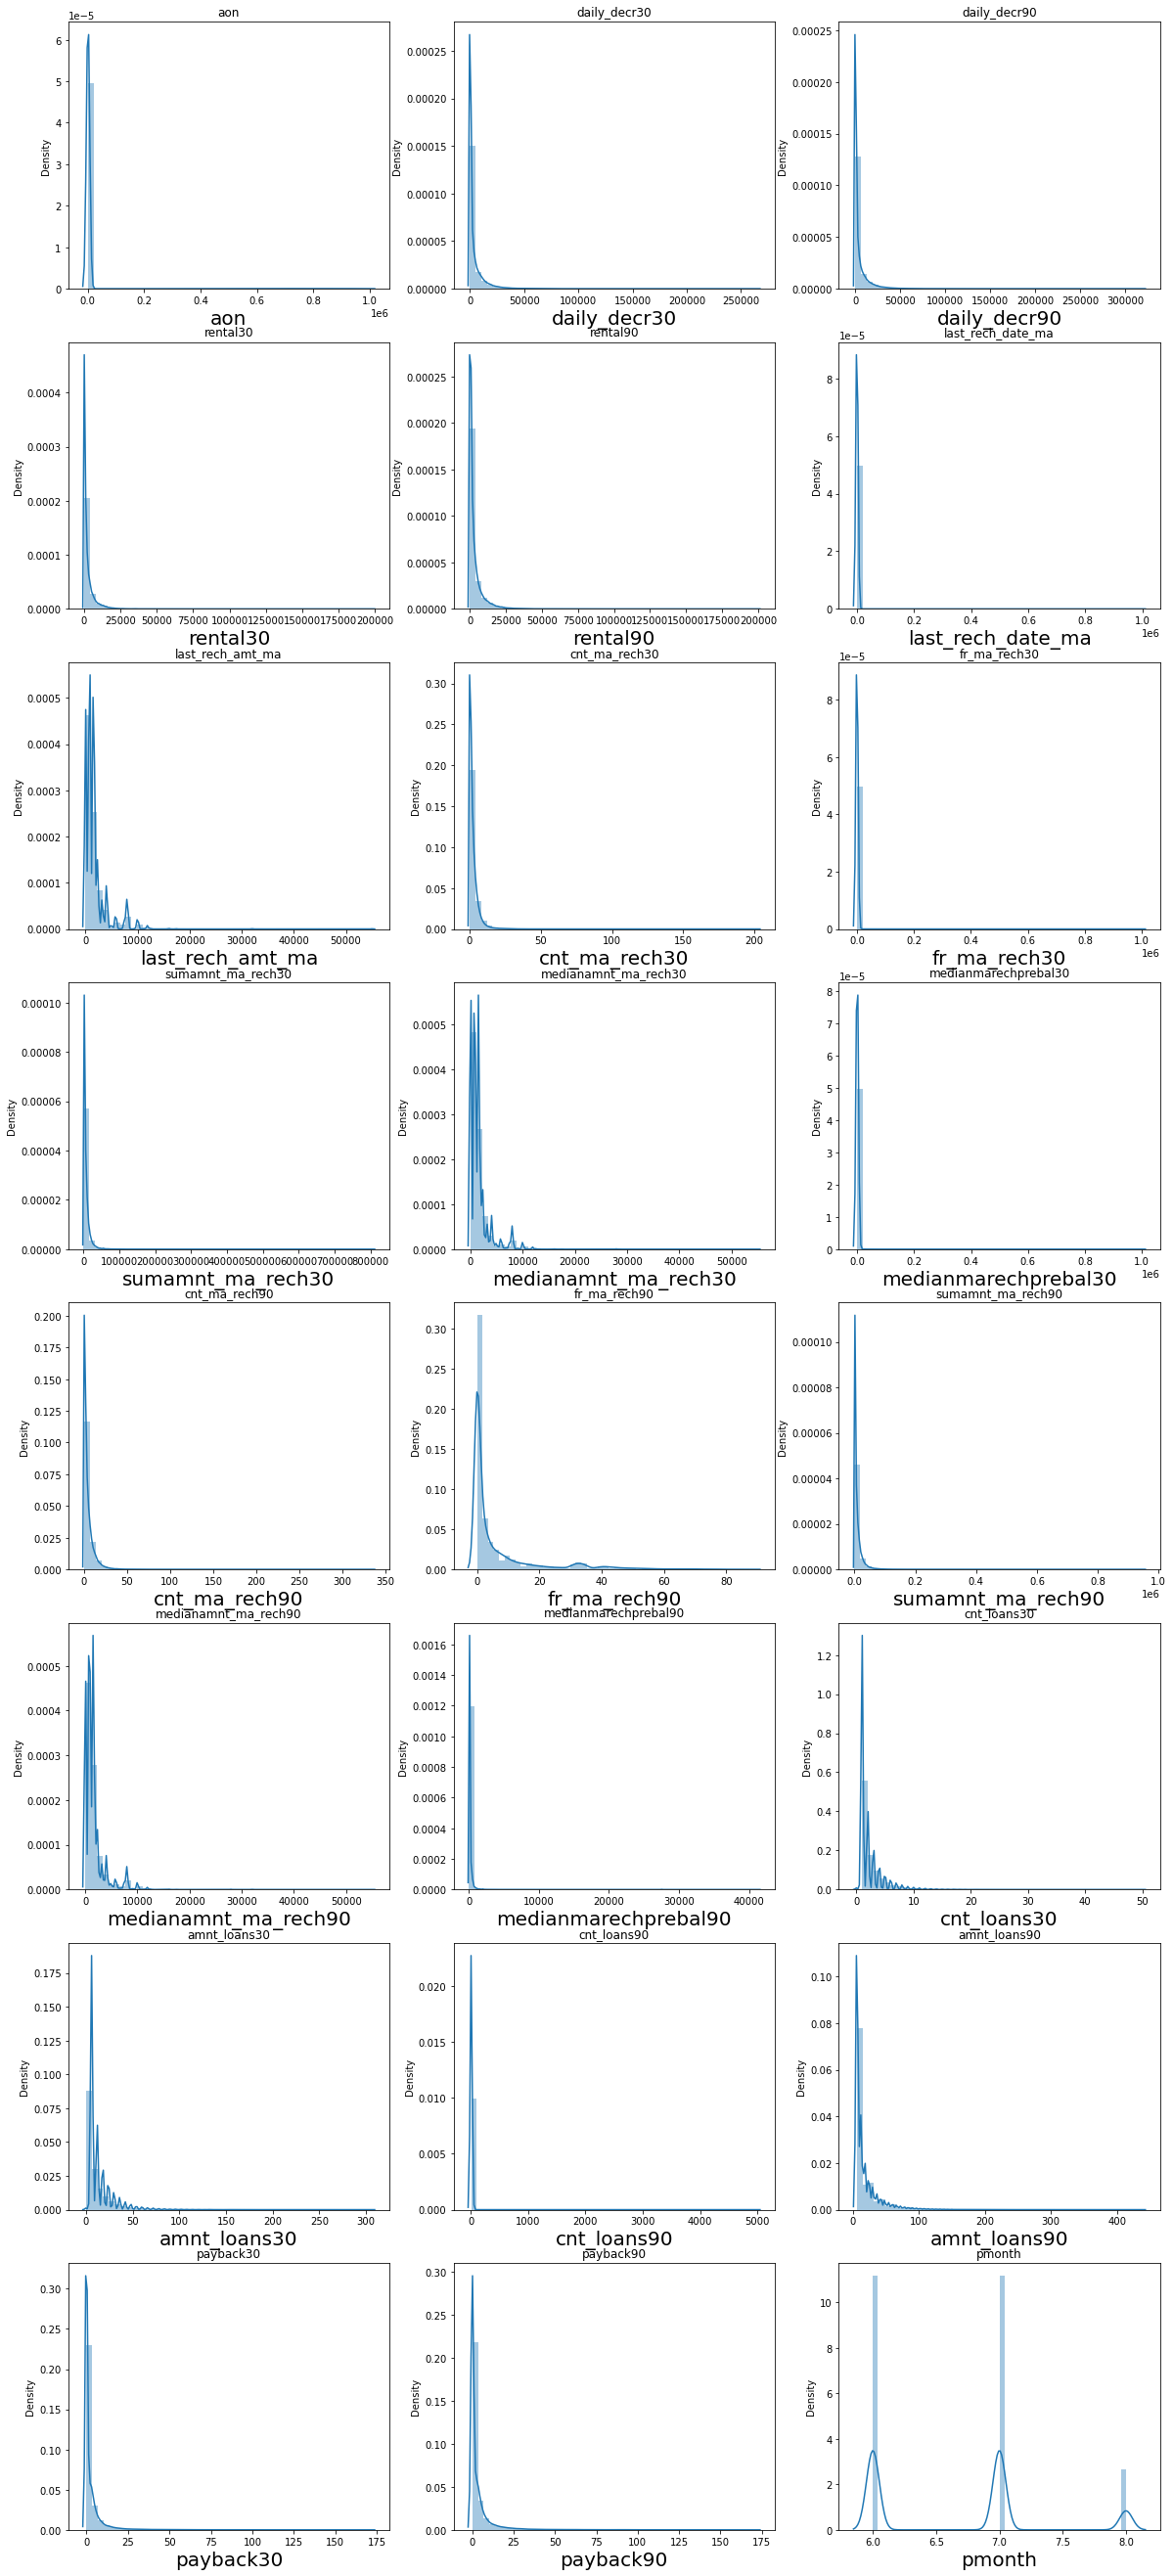

In [29]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for i in listy:
    ax=plt.subplot(50,3,plotnumber)
    sn.distplot(dff[i])
    plt.xlabel(i,fontsize=20)
    plt.title(i)
    plotnumber+=1
plt.show()

### OBSERVATIONS:
###  there is skewness in most of the columns so we have to treat them.
### apart from pmonth rest all columns have datapoints in normal distribution (with some distortion also)
### pmonth has bimodal plot distribution

<AxesSubplot:xlabel='label', ylabel='count'>

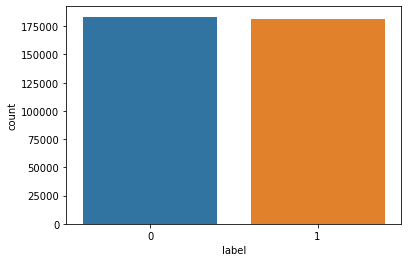

In [30]:
sn.countplot(dff['label'])

### we have already balanced dataset earlier

### Bivariate analysis

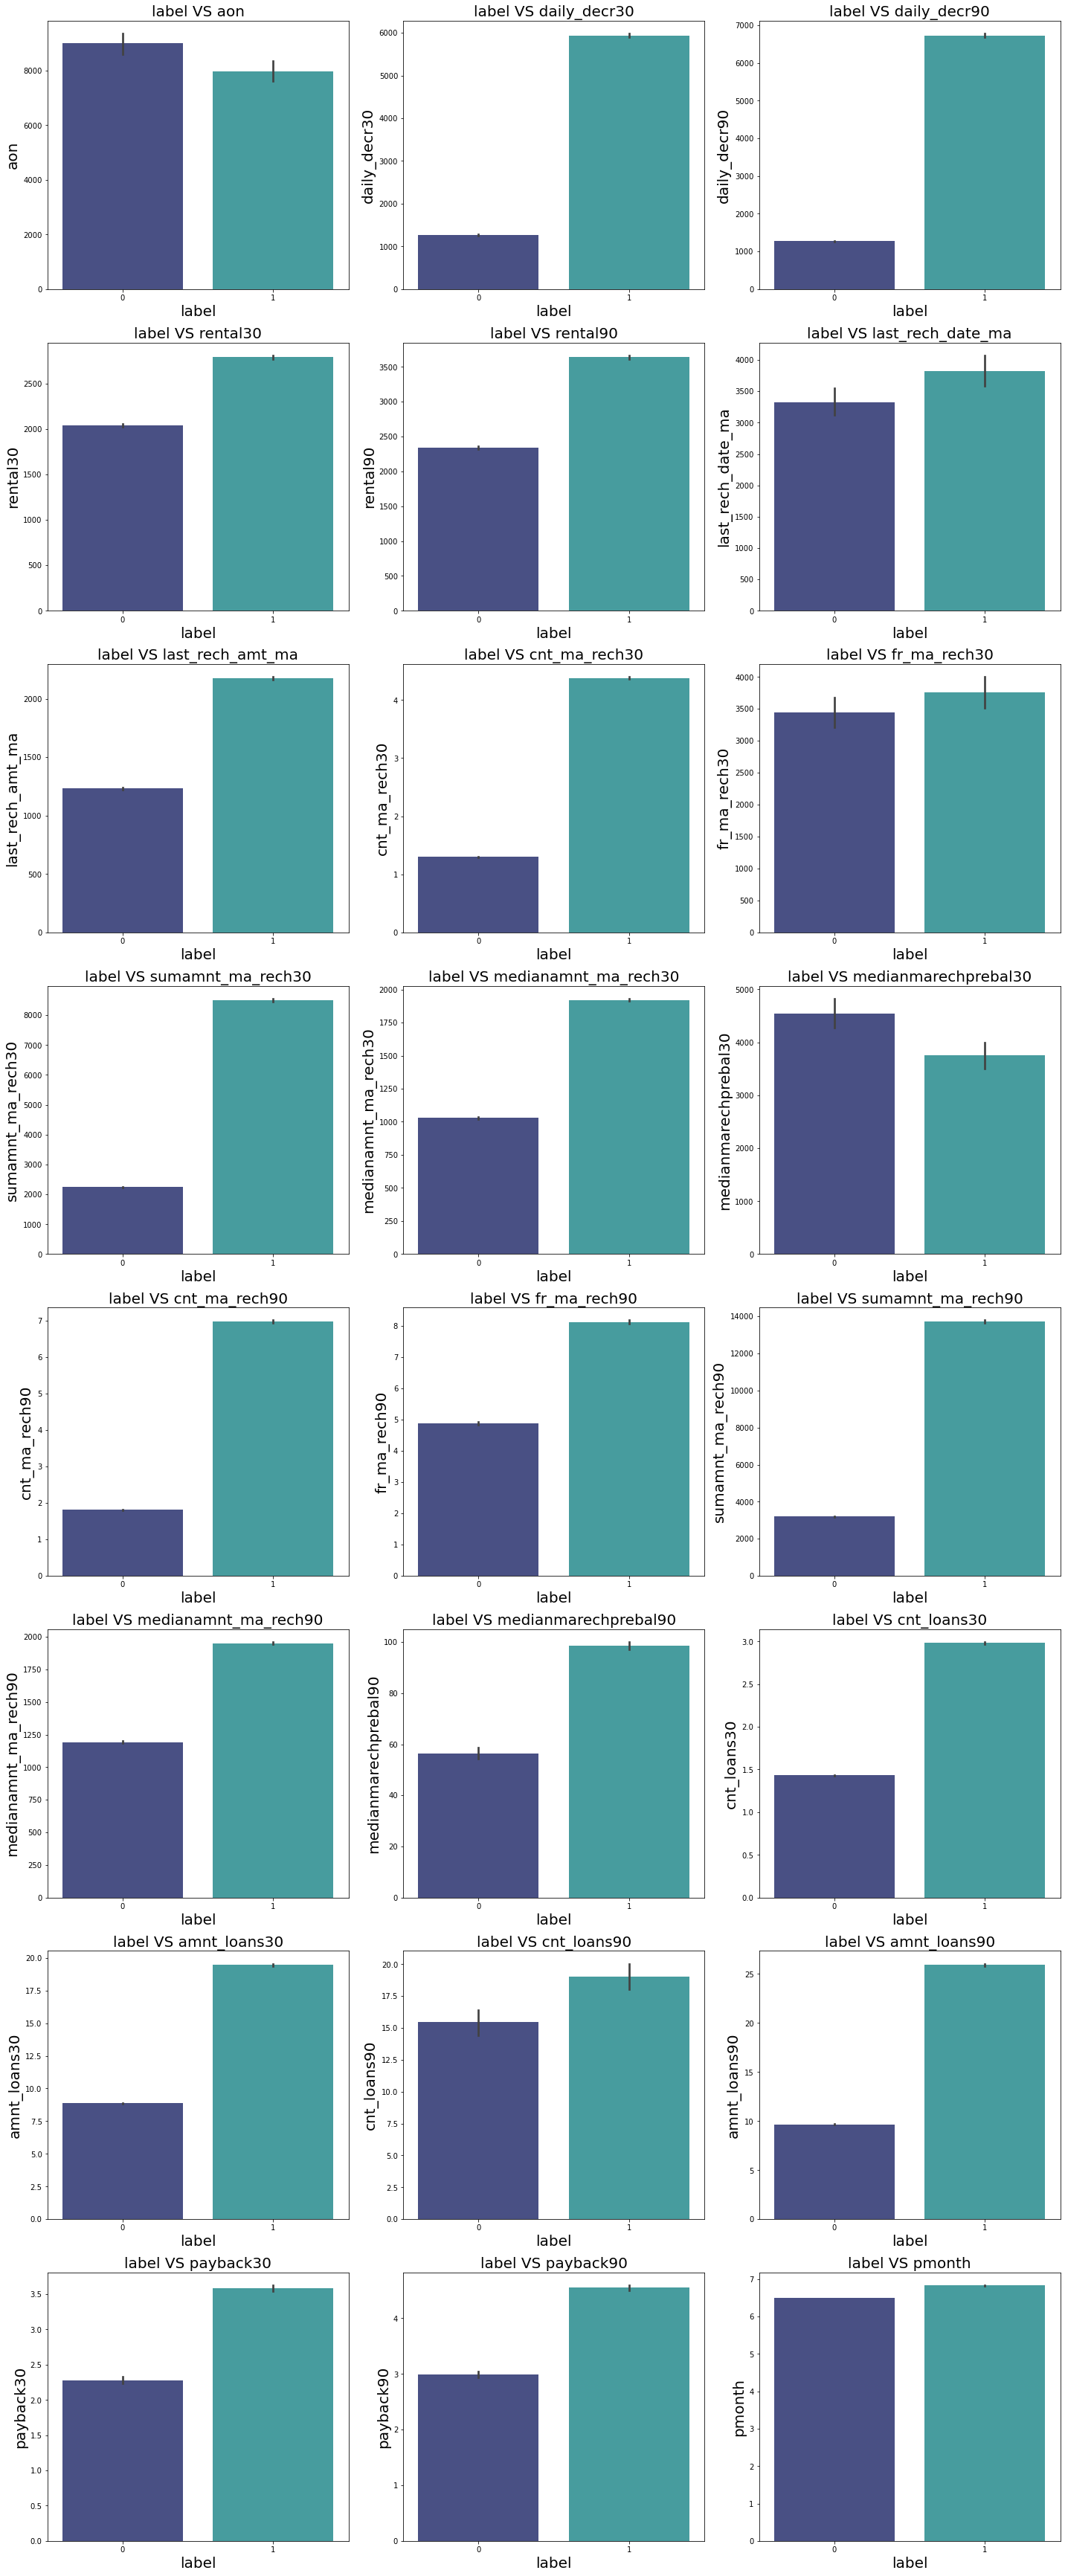

In [31]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for i in listy:
    ax=plt.subplot(50,3,plotnumber)
    sn.barplot(x=dff['label'], y=dff[i], palette="mako")
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    plt.xlabel('label',fontsize=20)
    plt.ylabel(i,fontsize=20)
    plt.title(f"label VS {i}",fontsize=20)
    plotnumber+=1
    plt.tight_layout()

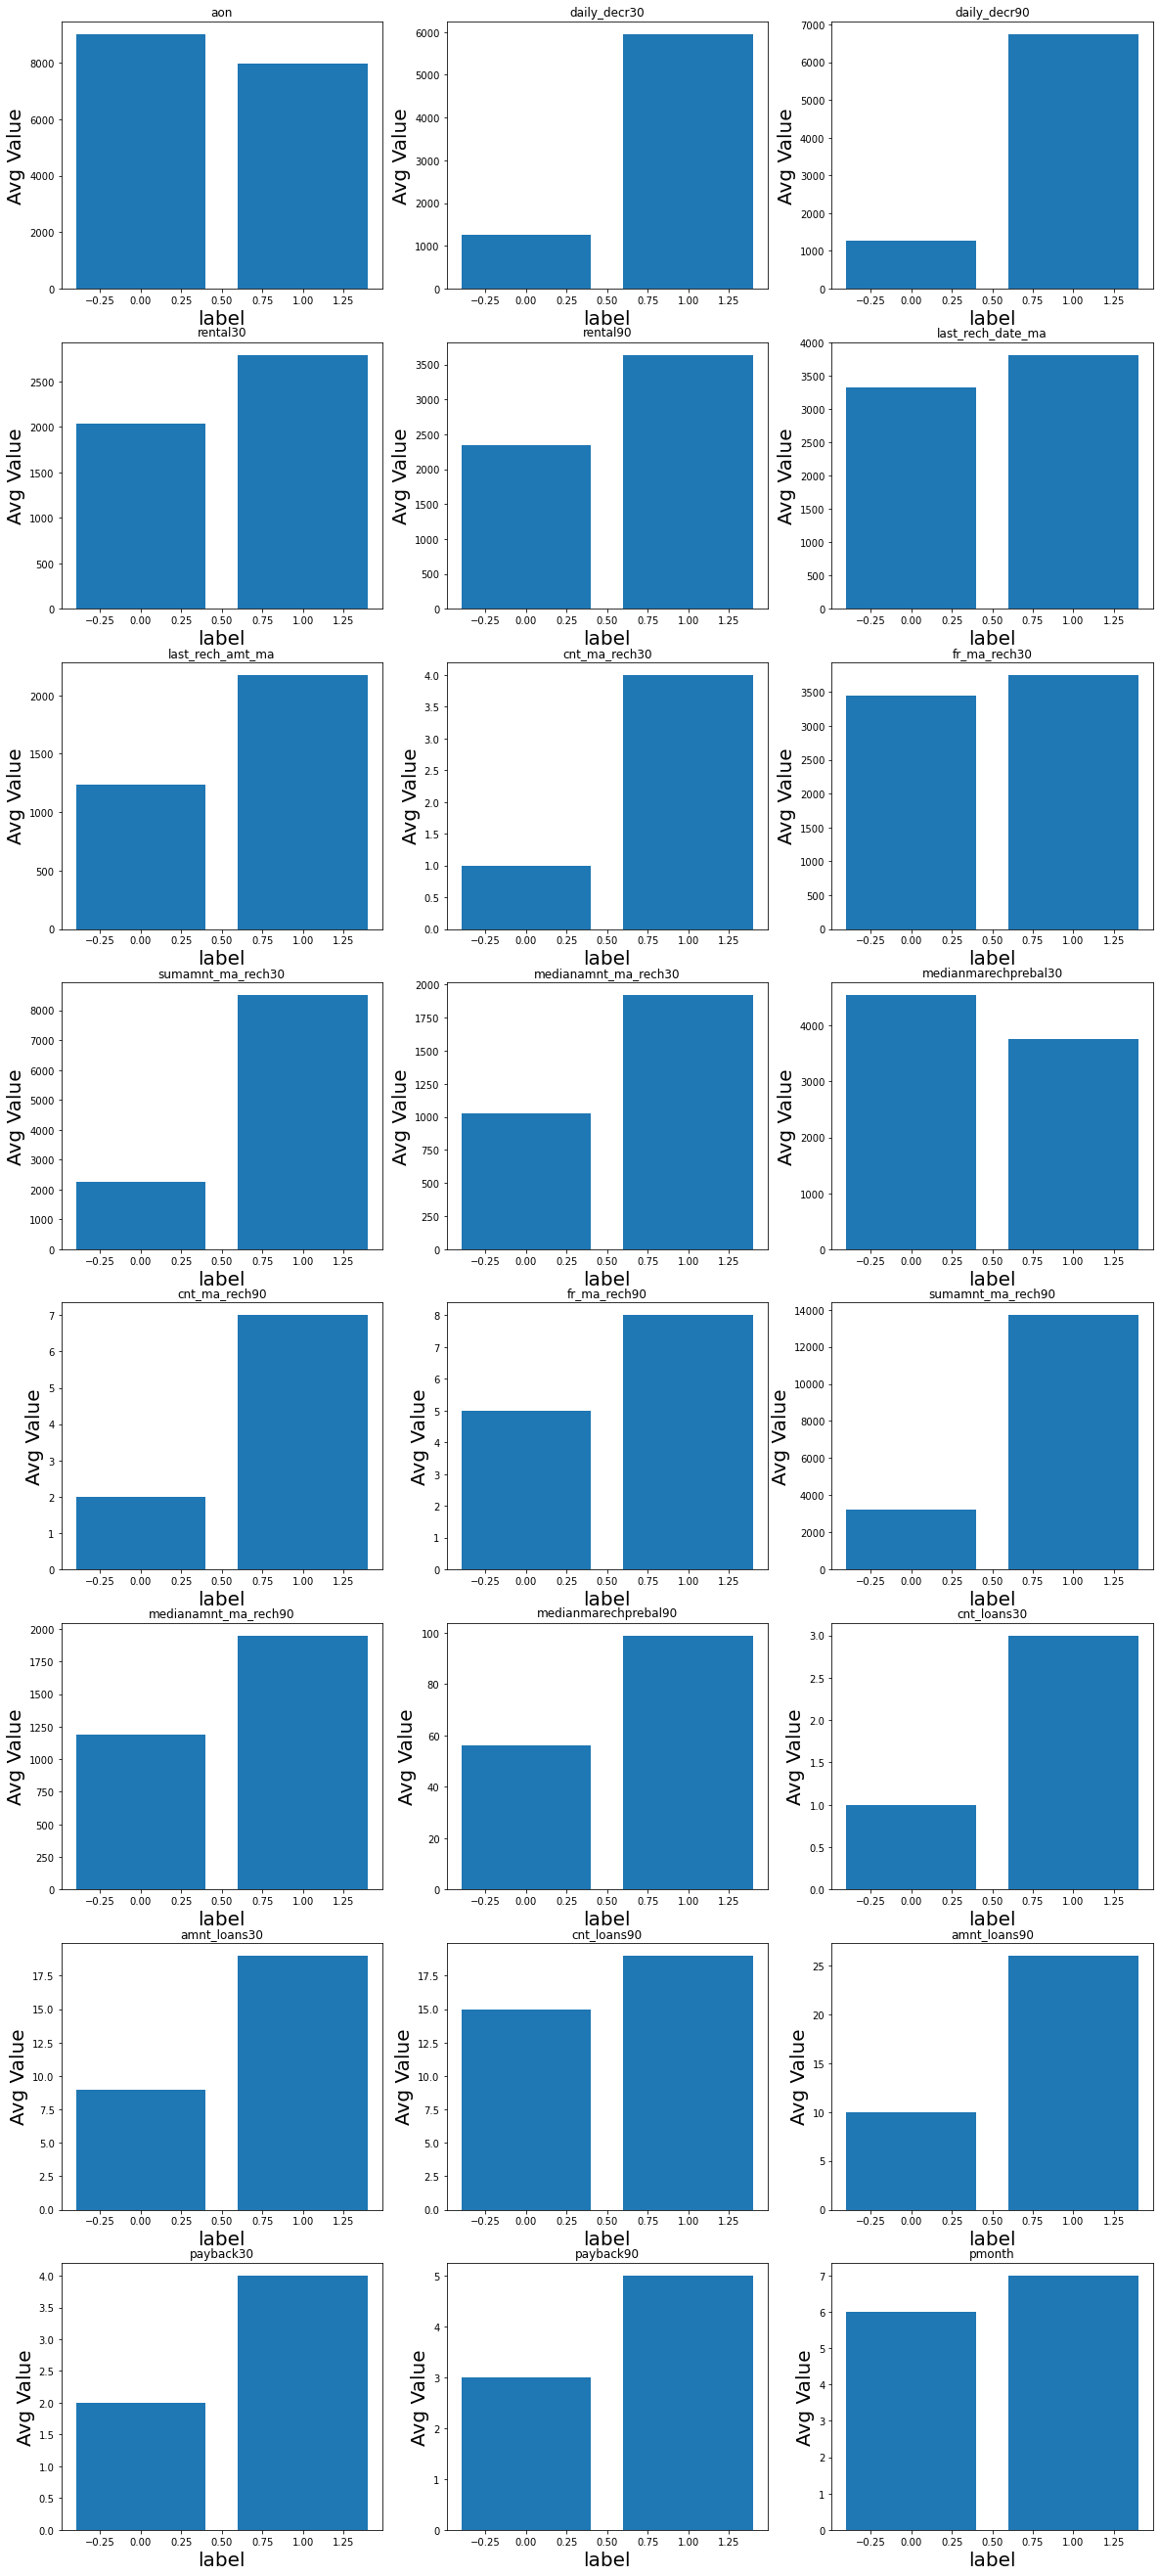

In [32]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for i in listy:
    y0=round(dff[dff['label']==0][i].mean())
    y1=round(dff[dff['label']==1][i].mean())
    ax=plt.subplot(50,3,plotnumber)
    plt.bar([0,1],[y0,y1])
    plt.xlabel('label',fontsize=20)
    plt.ylabel('Avg Value',fontsize=20)
    plt.title(i)
    plotnumber+=1
plt.show()

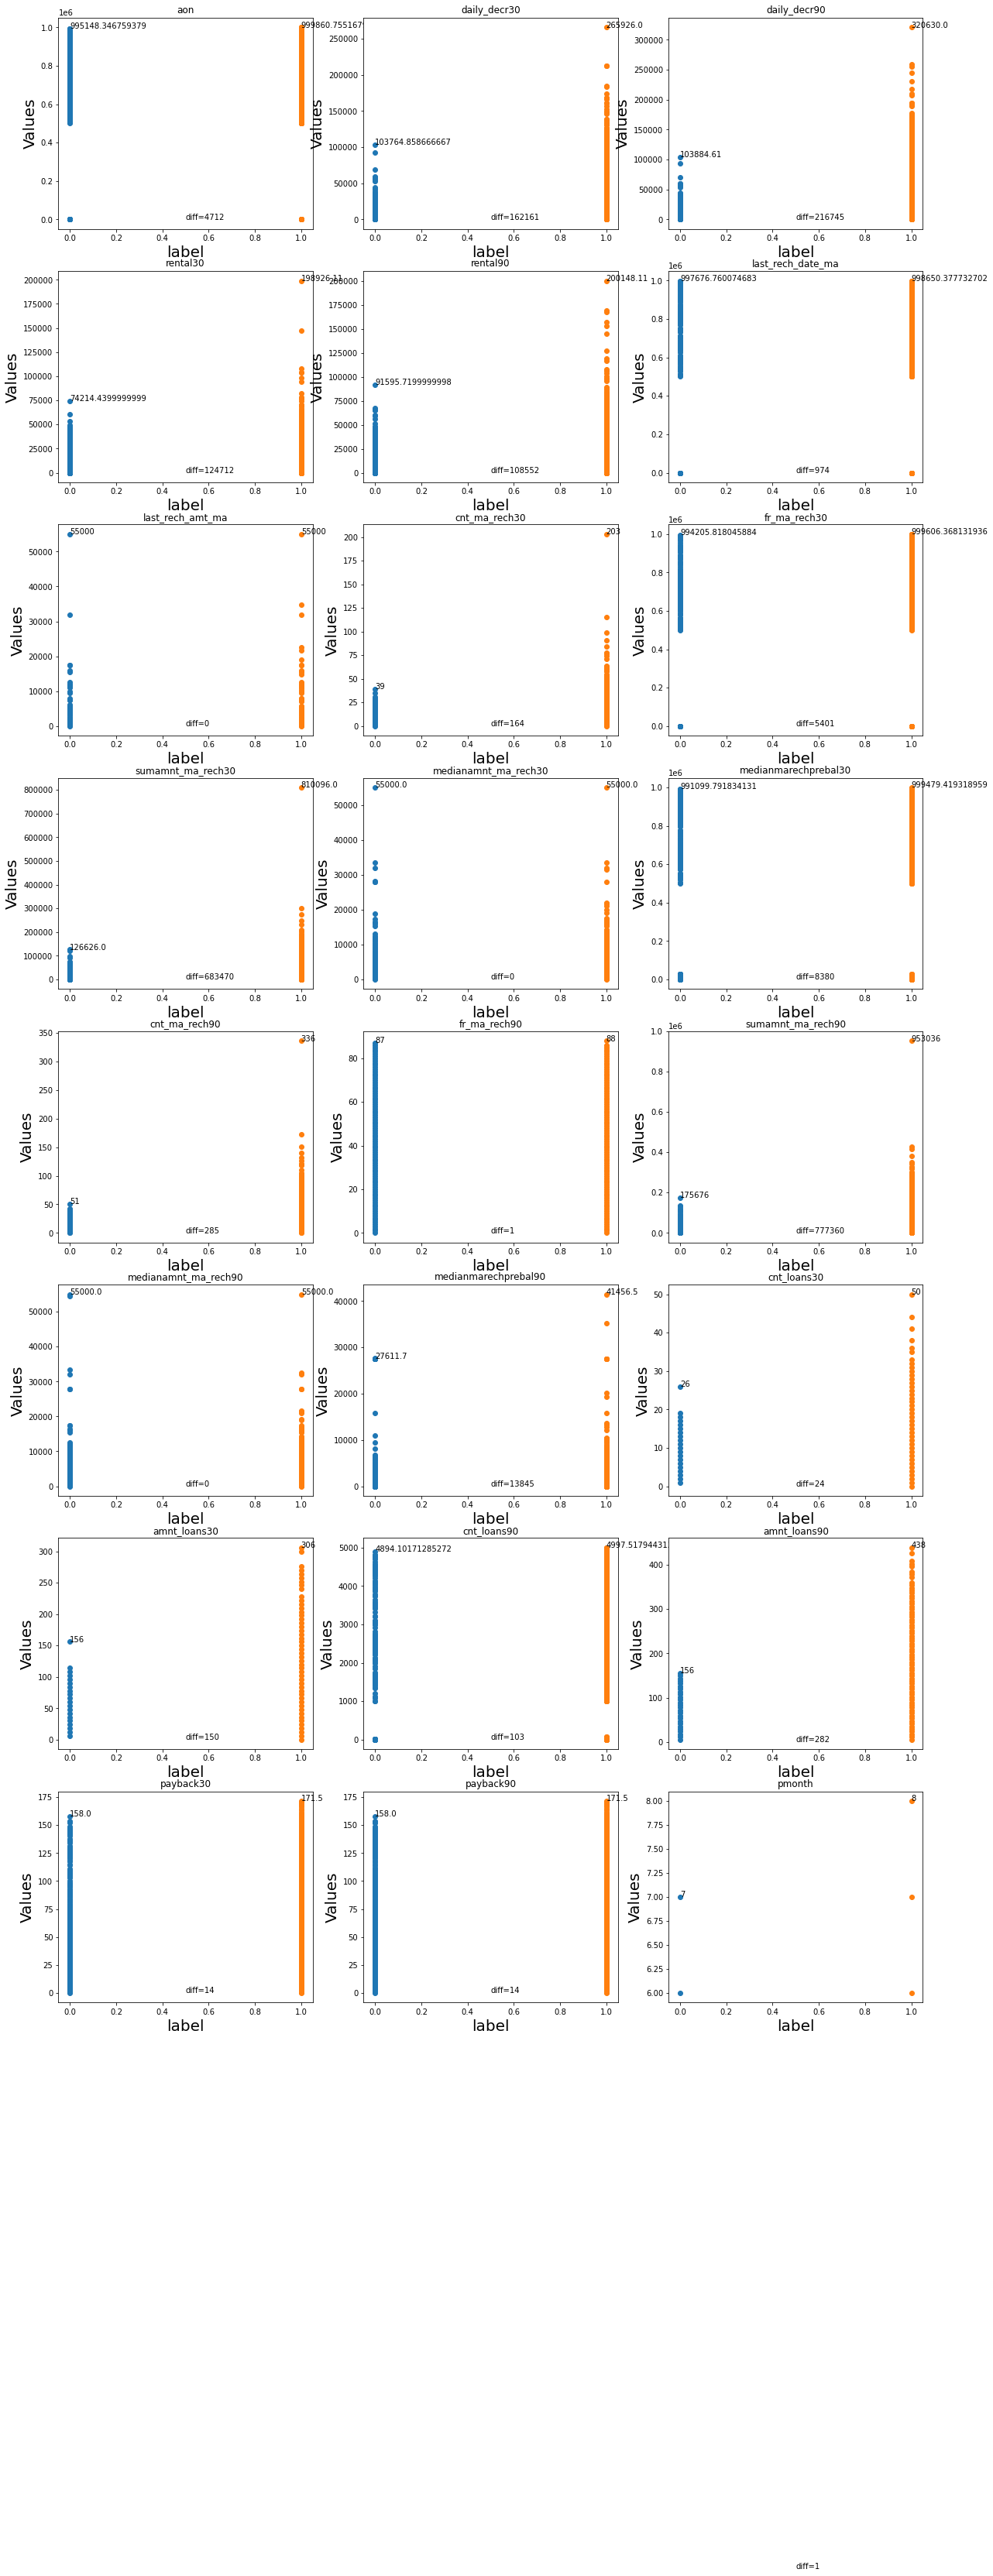

In [33]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for i in listy:
    y0=dff[dff['label']==0][i].value_counts().index.tolist()
    y1=dff[dff['label']==1][i].value_counts().index.tolist()
    ax=plt.subplot(50,3,plotnumber)
    plt.scatter([0 for i in range(len(y0))],y0)
    plt.scatter([1 for i in range(len(y1))],y1)
    plt.text(0,max(y0),max(y0))
    plt.text(1,max(y1),max(y1))
    plt.text(0.5,0,'diff='+str(round(max(y1)-max(y0))))
    plt.xlabel('label',fontsize=20)
    plt.ylabel('Values',fontsize=20)
    plt.title(i)
    plotnumber+=1
plt.show()

### Observation for all above graphs:
##### People with longer duration of network usage are maximum defaulters
##### People with higher Median of main account balance just before recharge in last 30 days at user level are maximum defaulters
##### People with higher
##### Peps with high value of Daily amount spent from main account, averaged over last 30 days (daily_decr30) are maximum indivduals who pay their loan.
##### Peps with high value of Daily amount spent from main account, averaged over last 90 days(daily_decr90) are maximum indivduals who pay their loan.
##### Peps with high value of Average main account balance over last 30 days(rental30) are maximum indivduals who pay their loan.
##### Peps with high value of Average main account balance over last 90 days(rental90) are maximum indivduals who pay their loan.
##### Peps with high Number of days till last recharge of main account(last_rech_date_ma) are maximum indivduals who pay their loan.
##### Peps with high value of Amount of last recharge of main account (last_rech_amt_ma) are maximum indivduals who pay their loan.
##### Peps with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum indivduals who pay their loan.
##### Peps with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are are maximum indivduals who pay their loan and also the count is high for defaulters comparitively Non-defaulters are more in number.
##### Peps with high value of Total amount of recharge in main account over last 30 days (sumamnt_ma_rech30) are maximum indivduals who pay their loan.
##### Peps with high value of Median of amount of recharges done in main account over last 30 days at user level (medianamnt_ma_rech30) are maximum indivduals who pay their loan.
##### Peps with high value of Median of main account balance just before recharge in last 30 days at user level (medianmarechprebal30) are maximum indivduals who pay their loan.
##### Peps with high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum indivduals who pay their loan.
##### Peps with high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum indivduals who pay their loan.
##### Peps with high value of Total amount of recharge in main account over last 90 days (sumamnt_ma_rech90) are maximum indivduals who pay their loan.
##### Peps with high value of Median of amount of recharges done in main account over last 90 days at user level (medianamnt_ma_rech90) are maximum indivduals who pay their loan.
##### Peps with high value of Median of main account balance just before recharge in last 90 days at user level (medianmarechprebal90) are maximum indivduals who pay their loan.
##### Peps with high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum indivduals who pay their loan.
##### Peps with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum indivduals who pay their loan.
##### Peps with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum indivduals who pay their loan.
##### Peps with high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum indivduals who pay their loan.
##### Peps with high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum indivduals who pay their loan.
##### Peps with high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum indivduals who pay their loan.
##### Peps with high value of Average payback time in days over last 30 days(payback30) are maximum indivduals who pay their loan.
##### Peps with high value of Average payback time in days over last 90 days(payback90) are maximum indivduals who pay their loan.
##### Peps having pmonth 8 have always payed back their loan
### From bar graph we can also see there are outliers present
### search them and remove them

### Data Cleaning:
### Checking for outliers:

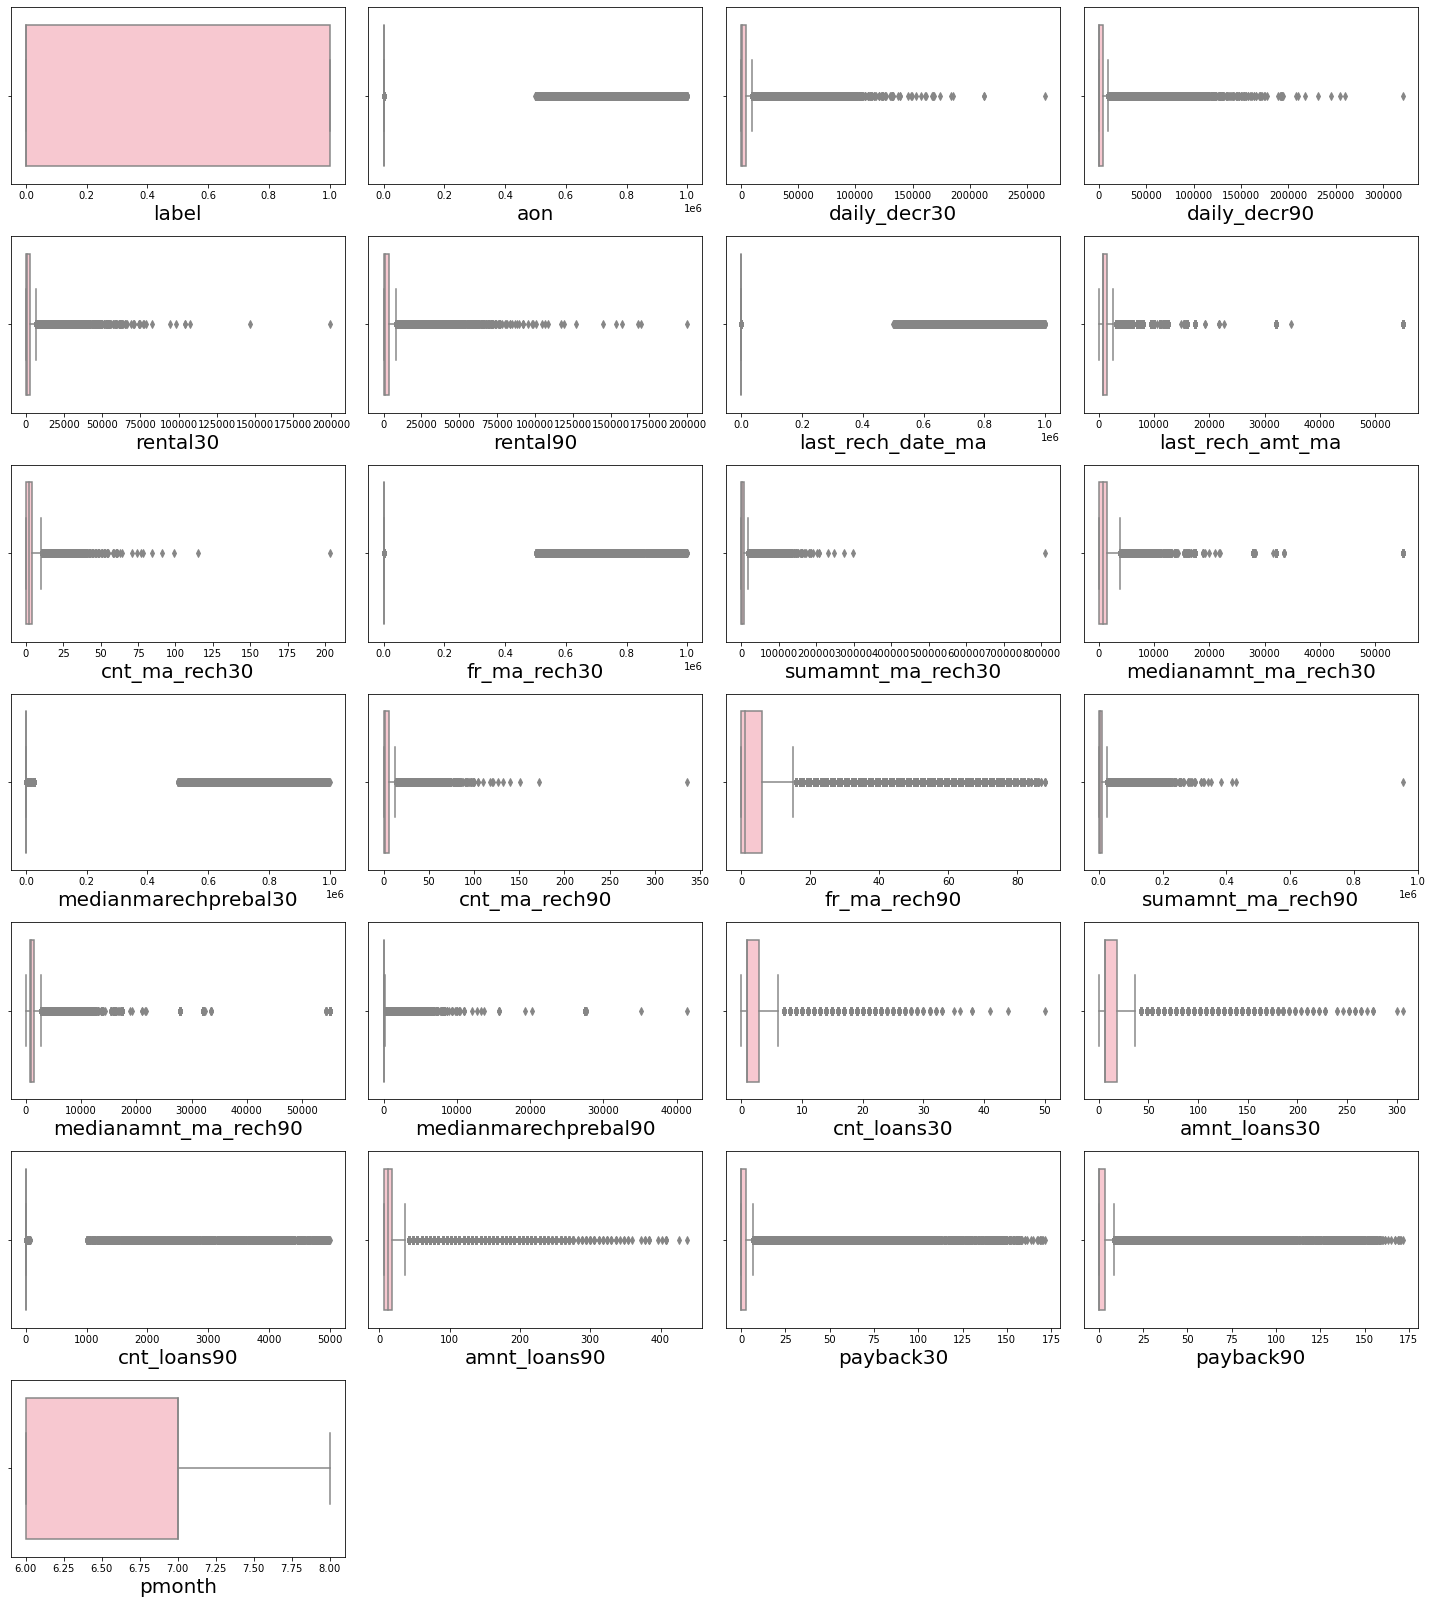

In [34]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sn.boxplot(dff[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Outliers are present in every column expect for pmonth

### Remove them

In [35]:
listy.remove('pmonth')
listy

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_loans30',
 'amnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [36]:
dff.shape

(364819, 25)

### Removing Outliers:
- Zscore method:

In [37]:
z=np.abs(zscore(dff[listy]))
df_new=dff[(z<3).all(axis=1)]
df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,1.0,12,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,1.0,6,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,2.0,12,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,7.0,42,2.333333,2.333333,6
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,3,18,3.0,18,11.000000,8.333333,7


In [38]:
df_new.shape

(295217, 25)

In [39]:
Dataloss = (((dff.shape[0]-df_new.shape[0])/dff.shape[0])*100)
Dataloss

19.07850194205894

### In Z-score method the data loss is more than 10% so lets check IQR method to remove outliers.

- IQR method:

In [40]:
Q1=dff[listy].quantile(0.25)

Q3=dff[listy].quantile(0.75)

IQR=Q3 - Q1

df_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
Dataloss = (((dff.shape[0]-df_1.shape[0])/dff.shape[0])*100)
Dataloss

61.13990773506862

### In IQR method the data loss is more than 10% so lets use percentile method to remove outliers.

In [42]:
for col in listy:
    percentile = dff[col].quantile([0.01,0.98]).values
    dff[col][dff[col]<=percentile[0]]=percentile[0]
    dff[col][dff[col]>=percentile[1]]=percentile[1]

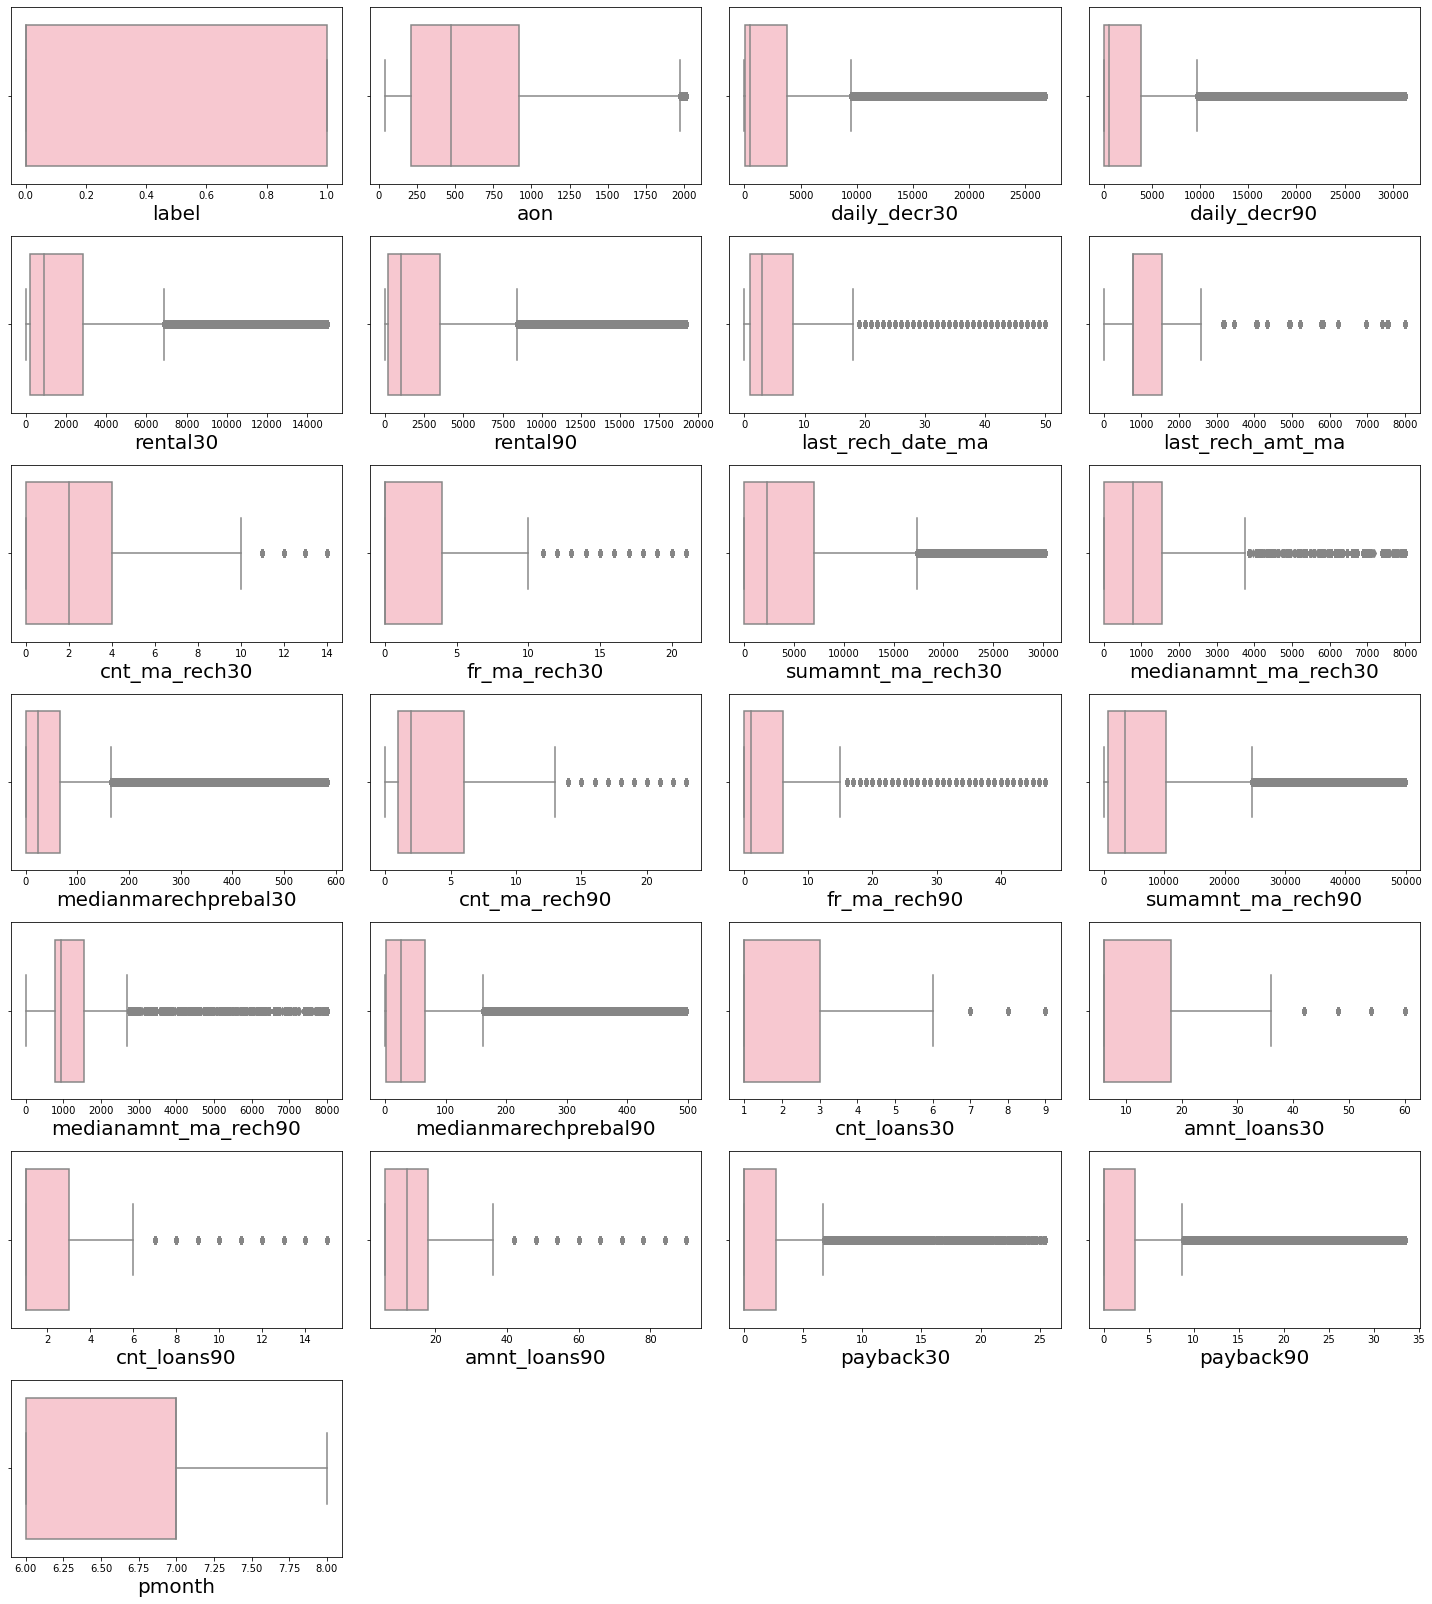

In [43]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sn.boxplot(dff[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Outliers are reduced to some extent

### Check skewness

In [44]:
print(dff[listy].skew())
print(len(dff[listy].skew().loc[dff[listy].skew()>0.55]))

aon                     1.022268
daily_decr30            2.398688
daily_decr90            2.529767
rental30                2.196557
rental90                2.268951
last_rech_date_ma       2.411731
last_rech_amt_ma        2.093678
cnt_ma_rech30           1.694185
fr_ma_rech30            1.992427
sumamnt_ma_rech30       1.996563
medianamnt_ma_rech30    2.296886
medianmarechprebal30    3.006313
cnt_ma_rech90           1.871836
fr_ma_rech90            2.235240
sumamnt_ma_rech90       2.128282
medianamnt_ma_rech90    2.255631
medianmarechprebal90    2.893772
cnt_loans30             2.033932
amnt_loans30            2.072804
cnt_loans90             2.372262
amnt_loans90            2.288744
payback30               3.037782
payback90               3.061069
dtype: float64
23


### Every numerical contains skewness in them 
### reduce skewness using yeo-johnson method

In [45]:
scaler = PowerTransformer(method='yeo-johnson',standardize=True)
#applying Power Transformation method for this particular column
dff[listy] = scaler.fit_transform(dff[listy])

In [46]:
print(dff[listy].skew())
print(len(dff[listy].skew().loc[dff[listy].skew()>0.55]))

aon                    -0.053316
daily_decr30           -0.082770
daily_decr90           -0.075683
rental30               -0.119164
rental90               -0.116561
last_rech_date_ma       0.068162
last_rech_amt_ma       -0.401904
cnt_ma_rech30           0.052610
fr_ma_rech30            0.410220
sumamnt_ma_rech30      -0.407205
medianamnt_ma_rech30   -0.450275
medianmarechprebal30   -0.039734
cnt_ma_rech90           0.045461
fr_ma_rech90            0.341779
sumamnt_ma_rech90      -0.363397
medianamnt_ma_rech90   -0.411610
medianmarechprebal90   -0.065441
cnt_loans30             0.489167
amnt_loans30            0.403232
cnt_loans90             0.442523
amnt_loans90            0.360909
payback30               0.724178
payback90               0.582462
dtype: float64
2


### skewness has been removed to a greater extent

### Checking correlation using heat map

In [47]:
dff.corr()['label']

label                   1.000000
aon                     0.145112
daily_decr30            0.390141
daily_decr90            0.393720
rental30                0.198486
rental90                0.218206
last_rech_date_ma       0.076302
last_rech_amt_ma        0.359535
cnt_ma_rech30           0.514107
fr_ma_rech30            0.389296
sumamnt_ma_rech30       0.498764
medianamnt_ma_rech30    0.386380
medianmarechprebal30    0.387626
cnt_ma_rech90           0.536818
fr_ma_rech90            0.345843
sumamnt_ma_rech90       0.514016
medianamnt_ma_rech90    0.344980
medianmarechprebal90    0.365893
cnt_loans30             0.439753
amnt_loans30            0.459223
cnt_loans90             0.466608
amnt_loans90            0.484417
payback30               0.396825
payback90               0.404348
pmonth                  0.254317
Name: label, dtype: float64

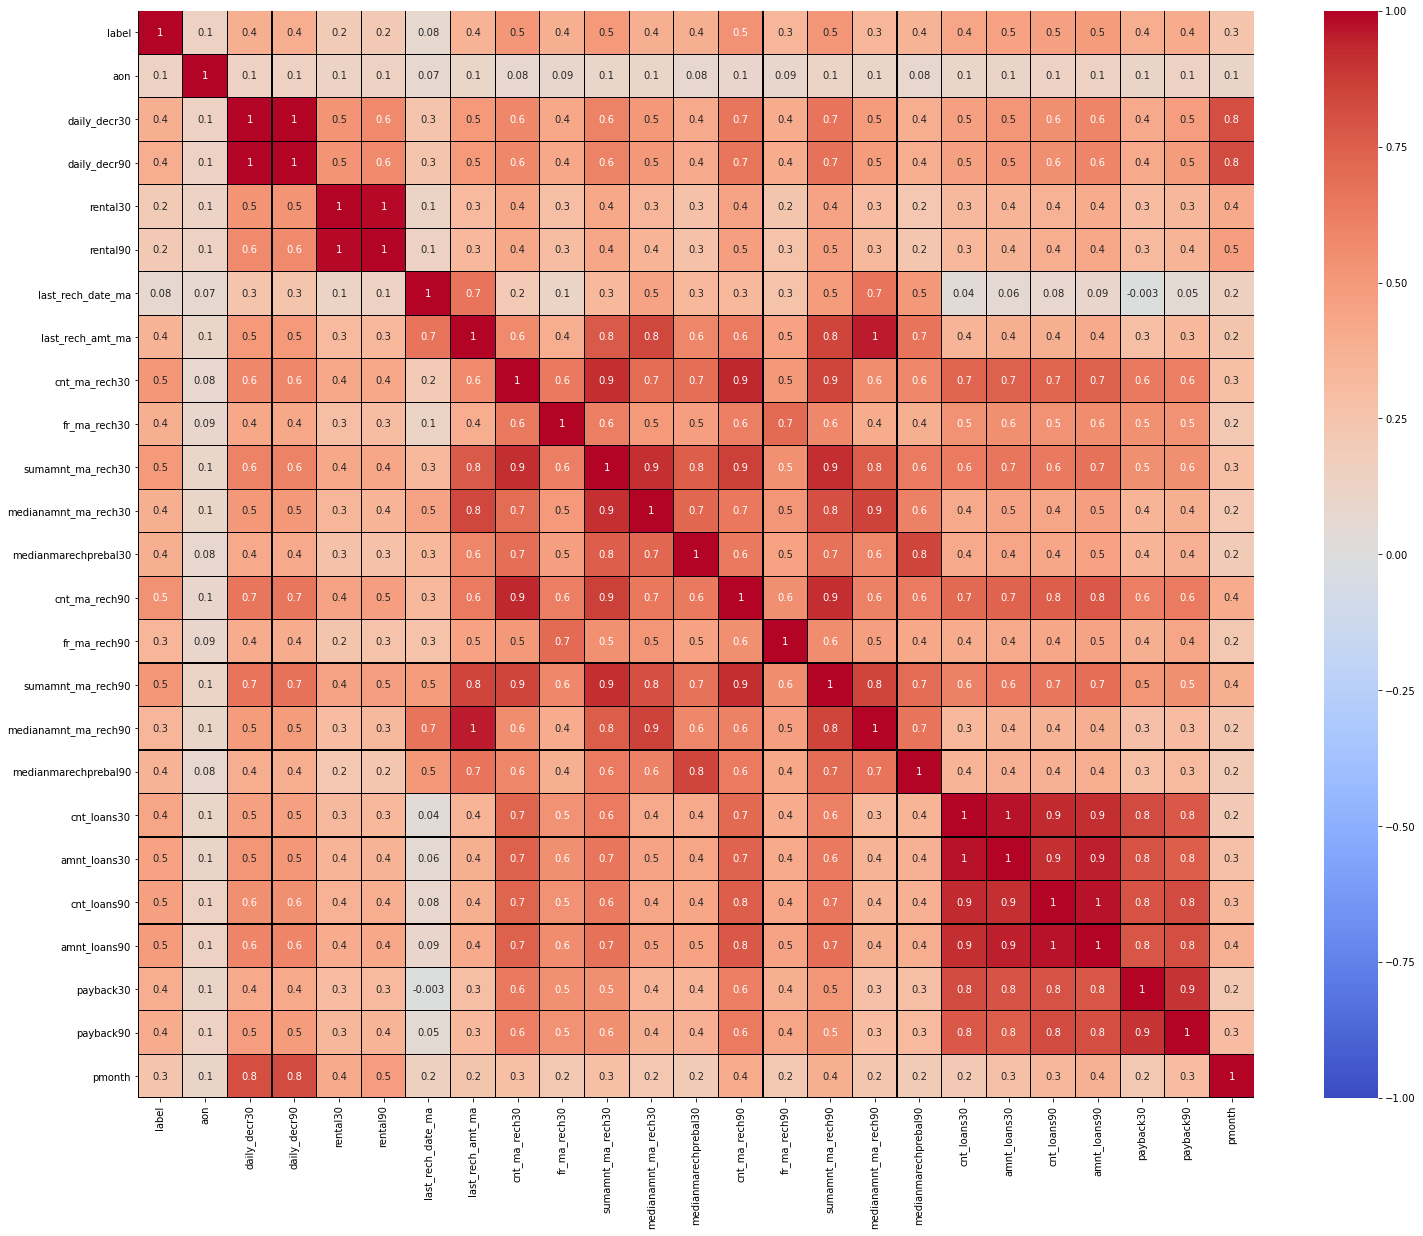

In [48]:
plt.figure(figsize=(25,20))
sn.heatmap(dff.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

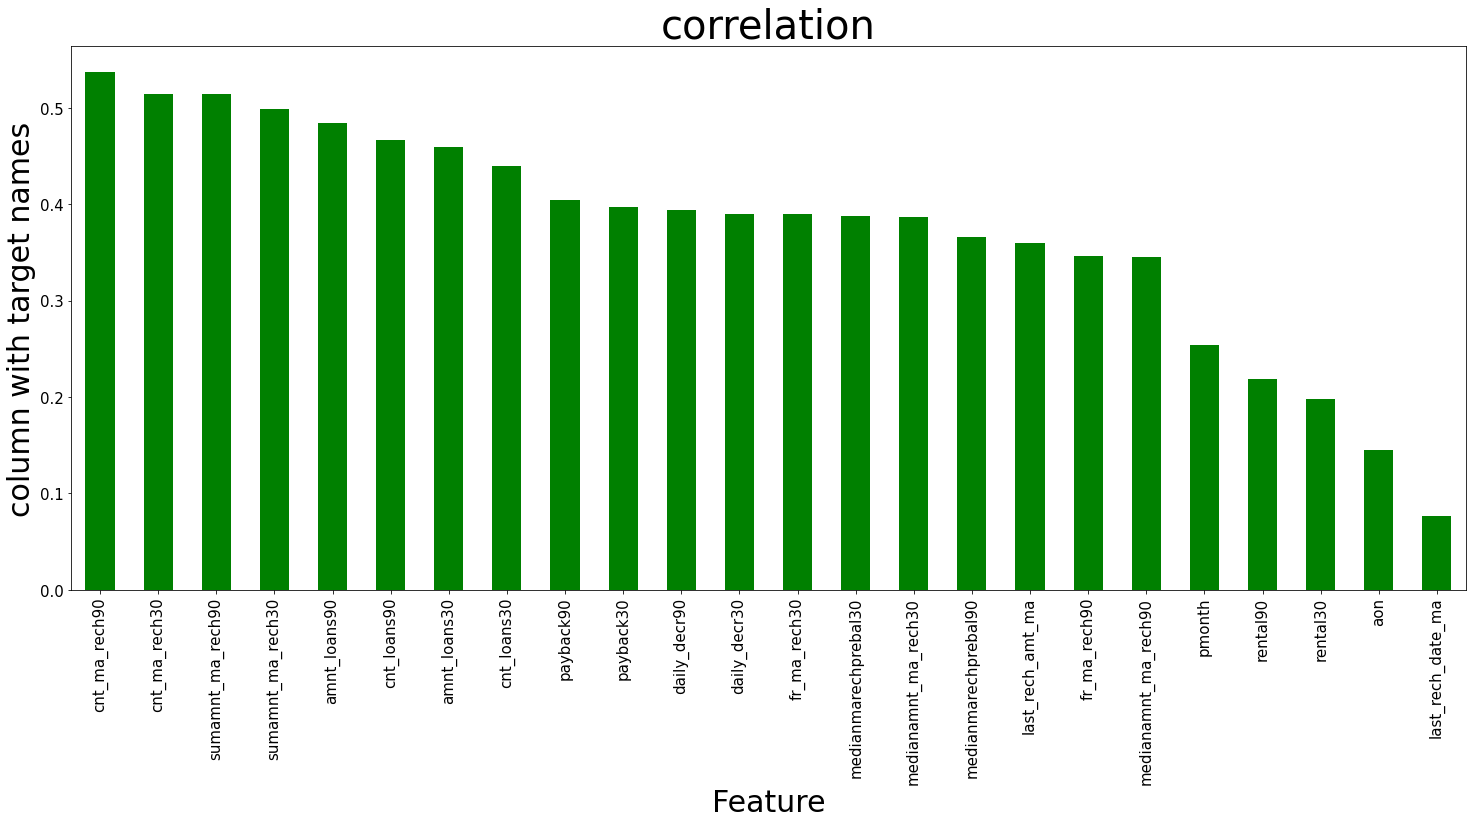

In [49]:
plt.figure(figsize=(25,10))
dff.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

### drop column last_rech_date_ma as it has extremely low correlation with the target variable label

In [50]:
dff=dff.drop(['last_rech_date_ma'],axis=1)
dff

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth
1,1,0.493798,1.323260,1.292977,0.884609,0.755095,1.539527,-0.335786,-0.882460,0.642403,1.559662,0.690305,-0.557631,-0.960570,0.385291,1.645914,0.633057,-0.847016,0.550625,-0.901527,0.336050,-0.715816,-0.776476,8
2,1,0.163692,0.527556,0.515706,0.037402,-0.040691,0.383080,-0.335786,-0.882460,0.020185,0.522148,0.734547,-0.557631,-0.960570,-0.217060,0.421939,0.684084,-0.847016,-0.887638,-0.901527,-0.935083,-0.715816,-0.776476,8
3,1,-0.670459,-0.754212,-0.753376,-0.724698,-0.764596,0.064278,-1.347364,-0.882460,-1.501573,-1.536090,-1.321506,-0.557631,-0.960570,-0.396649,0.087950,-0.903982,0.605530,0.550625,0.329548,0.336050,-0.715816,-0.776476,6
4,1,0.840966,-0.196860,-0.198691,0.143321,0.059257,0.688589,1.329016,0.637716,1.406590,0.800991,0.304759,1.068004,0.328852,1.251193,0.939564,0.304302,1.698692,1.624827,1.542031,1.476653,1.145828,0.920976,6
5,1,0.231393,0.695820,0.681309,-0.388963,-0.431250,0.383080,0.812858,1.438745,0.675905,0.522148,-0.004992,1.068004,-0.960570,0.788637,0.421939,0.579516,1.143569,1.052339,0.866145,0.833824,1.627181,1.458402,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137318,0,-0.337743,0.337212,0.328663,1.001890,0.959513,-1.673921,-1.347364,-0.882460,-1.501573,-1.536090,-1.321506,-1.440345,-0.960570,-1.622249,-1.683807,-1.438074,-0.847016,-0.887638,-0.901527,-0.935083,-0.715816,-0.776476,7
18870,0,-0.181746,0.331908,0.326551,0.316889,0.285658,-0.057698,-0.335786,-0.882460,-0.242117,0.112252,-0.017455,-0.082481,1.632922,-0.049741,0.220340,1.443703,-0.847016,-0.887638,0.329548,0.336050,-0.715816,-0.776476,7
201416,0,-0.353199,0.425927,0.415897,1.205829,1.087483,0.386749,-1.347364,-0.882460,-1.501573,-1.536090,-1.321506,-0.557631,-0.960570,-0.215034,0.425792,-0.509794,-0.847016,-0.887638,-0.901527,-0.935083,-0.715816,-0.776476,7
88348,0,-0.658437,-0.879701,-0.878928,-1.050988,-1.077633,0.383080,-0.335786,-0.882460,0.020185,0.522148,0.928933,-0.557631,-0.960570,-0.217060,0.421939,0.911103,0.605530,0.550625,0.329548,0.336050,-0.715816,-0.776476,6


In [51]:
listy.remove('last_rech_date_ma')

### Separating Features and Target

In [52]:
x = dff.drop("label",axis=1)
y = dff["label"]

### feature scaling data

In [53]:
scaler = StandardScaler()
x[listy]=scaler.fit_transform(x[listy])

### performing pca and choose appropriate component to train model

In [54]:
for i in range(2,x.shape[1]+1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.6709167237764216
3 0.7573171635714094
4 0.8009011129065012
5 0.842725289929831
6 0.8834002560717695
7 0.9141179138411043
8 0.9357542182389661
9 0.9525602743328141
10 0.9660858639644697
11 0.977251885404563
12 0.9835507272309999
13 0.9874293424911066
14 0.9903994041019415
15 0.9930339424791462
16 0.9951782098697253
17 0.9970088953305973
18 0.9983202067942691
19 0.9991187669764664
20 0.9996018221402772
21 0.9998904322690125
22 0.9999764663691729
23 1.0000000000000002


### i will use 14 as data retention is good(personal choice)

In [55]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(x)

### Now find best model to use and optimize that model

In [56]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier()]

In [57]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 97,test_size=0.20,
                                               stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8292746558935005
roc 0.7564015747818272
diff 0.07287308111167323
roc bigger
**********
DecisionTreeClassifier()
score 0.9449389678989062
roc 0.9547912523520231
diff 0.009852284453116922
**********
KNeighborsClassifier()
score 0.9390452730295703
roc 0.8945491516673759
diff 0.044496121362194385
**********
RandomForestClassifier()
score 0.9971784061738089
roc 0.9771748833191695
diff 0.020003522854639466
**********
RidgeClassifier()
score 0.8283408828068758
roc 0.7542648723192609
diff 0.07407601048761492
**********
BaggingClassifier()
score 0.9936178322768339
roc 0.9629101928925846
diff 0.030707639384249252
**********
GradientBoostingClassifier()
score 0.8923687080418989
roc 0.8056383893894031
diff 0.08673031865249581
**********
LGBMClassifier()
score 0.9127826952864198
roc 0.8274946465562173
diff 0.08528804873020246
[09:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the de

### hypertune top model
- ExtraTreesClassifier
### recheck the model accuracy and choose then

In [58]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20,stratify=y)

In [59]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':list(range(3,36))}
clf = RandomizedSearchCV(ExtraTreesClassifier(), parameters, cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 15.8min finished


{'max_features': 'log2', 'max_depth': 33, 'criterion': 'gini'}

### Find best random state for best model

In [60]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

In [61]:
besttrain(ExtraTreesClassifier(max_depth=33,criterion='gini',max_features='log2'),principalComponents,y)

maximum roc_auc_score is at random state : 57  and it is : 0.9812509653468394


In [63]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 57,test_size=0.20,
                                               stratify=y)
model = ExtraTreesClassifier(max_depth=33,criterion='gini',max_features='log2')
scores=cross_val_score(model,x_train,y_train,cv=5,scoring='roc_auc',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('roc',roc_auc_score(y_test,y_pred))
if roc_auc_score(y_test,y_pred)>score:
    diff=roc_auc_score(y_test,y_pred)-score
    print('roc bigger')
else:
    diff=score-roc_auc_score(y_test,y_pred)
print('diff',diff)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
std=np.std(scores)
print('std:',std)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   42.6s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.1s finished


cross_val_score: 0.9966996062741023
roc 0.9813344264946915
diff 0.015365179779410765
Confusion matrix 
 [[36623    63]
 [ 1292 34986]]
f1 score is :  0.9810029862464424
classification report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     36686
           1       1.00      0.96      0.98     36278

    accuracy                           0.98     72964
   macro avg       0.98      0.98      0.98     72964
weighted avg       0.98      0.98      0.98     72964

std: 0.00018695852116856946


### ROC-AUC curve:

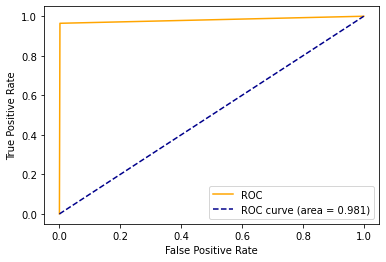

In [64]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [66]:
dff['label_pred']=model.predict(principalComponents)
dff

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth,label_pred
1,1,0.493798,1.323260,1.292977,0.884609,0.755095,1.539527,-0.335786,-0.882460,0.642403,1.559662,0.690305,-0.557631,-0.960570,0.385291,1.645914,0.633057,-0.847016,0.550625,-0.901527,0.336050,-0.715816,-0.776476,8,1
2,1,0.163692,0.527556,0.515706,0.037402,-0.040691,0.383080,-0.335786,-0.882460,0.020185,0.522148,0.734547,-0.557631,-0.960570,-0.217060,0.421939,0.684084,-0.847016,-0.887638,-0.901527,-0.935083,-0.715816,-0.776476,8,1
3,1,-0.670459,-0.754212,-0.753376,-0.724698,-0.764596,0.064278,-1.347364,-0.882460,-1.501573,-1.536090,-1.321506,-0.557631,-0.960570,-0.396649,0.087950,-0.903982,0.605530,0.550625,0.329548,0.336050,-0.715816,-0.776476,6,1
4,1,0.840966,-0.196860,-0.198691,0.143321,0.059257,0.688589,1.329016,0.637716,1.406590,0.800991,0.304759,1.068004,0.328852,1.251193,0.939564,0.304302,1.698692,1.624827,1.542031,1.476653,1.145828,0.920976,6,1
5,1,0.231393,0.695820,0.681309,-0.388963,-0.431250,0.383080,0.812858,1.438745,0.675905,0.522148,-0.004992,1.068004,-0.960570,0.788637,0.421939,0.579516,1.143569,1.052339,0.866145,0.833824,1.627181,1.458402,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137318,0,-0.337743,0.337212,0.328663,1.001890,0.959513,-1.673921,-1.347364,-0.882460,-1.501573,-1.536090,-1.321506,-1.440345,-0.960570,-1.622249,-1.683807,-1.438074,-0.847016,-0.887638,-0.901527,-0.935083,-0.715816,-0.776476,7,0
18870,0,-0.181746,0.331908,0.326551,0.316889,0.285658,-0.057698,-0.335786,-0.882460,-0.242117,0.112252,-0.017455,-0.082481,1.632922,-0.049741,0.220340,1.443703,-0.847016,-0.887638,0.329548,0.336050,-0.715816,-0.776476,7,0
201416,0,-0.353199,0.425927,0.415897,1.205829,1.087483,0.386749,-1.347364,-0.882460,-1.501573,-1.536090,-1.321506,-0.557631,-0.960570,-0.215034,0.425792,-0.509794,-0.847016,-0.887638,-0.901527,-0.935083,-0.715816,-0.776476,7,0
88348,0,-0.658437,-0.879701,-0.878928,-1.050988,-1.077633,0.383080,-0.335786,-0.882460,0.020185,0.522148,0.928933,-0.557631,-0.960570,-0.217060,0.421939,0.911103,0.605530,0.550625,0.329548,0.336050,-0.715816,-0.776476,6,0


In [67]:
dff.label.value_counts(),dff.label_pred.value_counts()

(0    183431
 1    181388
 Name: label, dtype: int64,
 0    184883
 1    179936
 Name: label_pred, dtype: int64)

In [68]:
print('Number of falsely predicted loan paid while it was actually unpaid',
      dff.label_pred.value_counts()[1]-dff.label.value_counts()[1])

Number of falsely predicted loan paid while it was actually unpaid -1452


In [69]:
print('Number of falsely predicted loan unpaid while it was actually paid',
      dff.label_pred.value_counts()[0]-dff.label.value_counts()[0])

Number of falsely predicted loan unpaid while it was actually paid 1452


### Plot a graph which shows difference between value counts of actual value vs predicted values

Text(0.5, 1.0, 'Loan unpaid  vs paid')

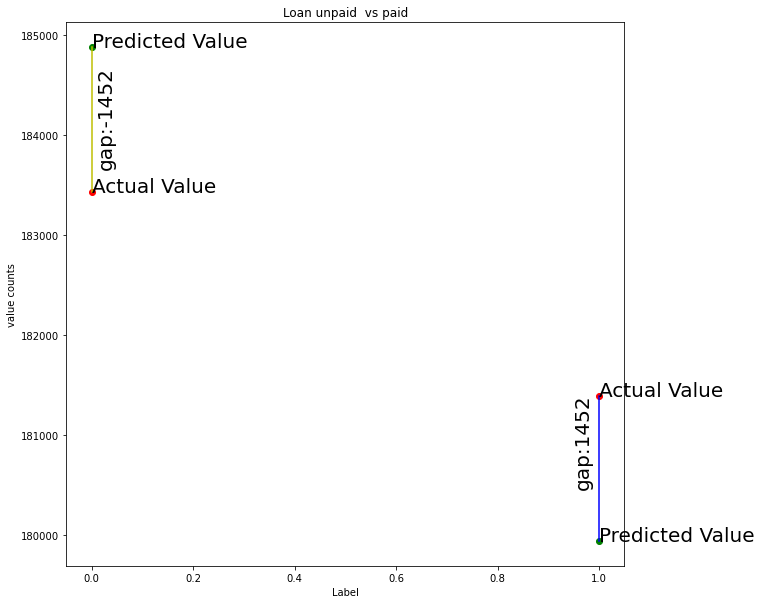

In [75]:
plt.figure(figsize=[10,10])
plt.scatter([0,1],[dff.label.value_counts()[0],dff.label.value_counts()[1]],color='r')
plt.scatter([0,1],[dff.label_pred.value_counts()[0],dff.label_pred.value_counts()[1]],color='g')
plt.plot([0,0],[dff.label.value_counts()[0],dff.label_pred.value_counts()[0]],color='y')
plt.plot([1,1],[dff.label.value_counts()[1],dff.label_pred.value_counts()[1]],color='b')
plt.text(0,dff.label.value_counts()[0],'Actual Value',fontsize=20)
plt.text(0,dff.label_pred.value_counts()[0],'Predicted Value',fontsize=20)
plt.text(1,dff.label.value_counts()[1],'Actual Value',fontsize=20)
plt.text(1,dff.label_pred.value_counts()[1],'Predicted Value',fontsize=20)
plt.text(0.01,183700,
         'gap:'+str(dff.label.value_counts()[0]-dff.label_pred.value_counts()[0]),fontsize=20,color='black',rotation='vertical')
plt.text(0.95,180500,
         'gap:'+str(dff.label.value_counts()[1]-dff.label_pred.value_counts()[1]),fontsize=20,color='black',rotation='vertical')
plt.xlabel("Label")
plt.ylabel('value counts')
plt.title('Loan unpaid  vs paid')

### Plot Confusion matrix 

<AxesSubplot:>

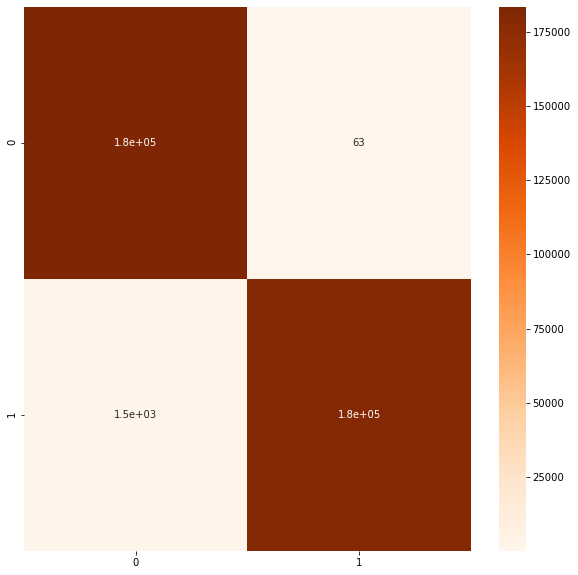

In [76]:
plt.figure(figsize=[10,10])
sn.heatmap(confusion_matrix(dff['label'],dff['label_pred']),annot=True,cmap="Oranges",xticklabels=model.classes_
               ,yticklabels=model.classes_)

In [77]:
confusion_matrix(dff['label'],dff['label_pred'])

array([[183368,     63],
       [  1515, 179873]], dtype=int64)

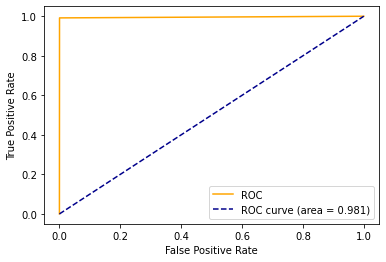

In [79]:
fpr, tpr, threshold = roc_curve(dff['label'],dff['label_pred'])
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [80]:
scores=cross_val_score(model,principalComponents,y,cv=5,scoring='roc_auc',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
print('roc',roc_auc_score(dff['label'],dff['label_pred']))
if roc_auc_score(dff['label'],dff['label_pred'])>score:
    diff=roc_auc_score(dff['label'],dff['label_pred'])-score
    print('roc bigger')
else:
    diff=score-roc_auc_score(dff['label'],dff['label_pred'])
print('diff',diff)
print("Confusion matrix \n",confusion_matrix(dff['label'],dff['label_pred']))
print("f1 score is : ",f1_score(dff['label'],dff['label_pred']))
print("classification report \n",classification_report(dff['label'],dff['label_pred']))
std=np.std(scores)
print('std:',std)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.3s finished


cross_val_score: 0.9977680339136483
roc 0.9956521425763813
diff 0.002115891337266973
Confusion matrix 
 [[183368     63]
 [  1515 179873]]
f1 score is :  0.9956327285206629
classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    183431
           1       1.00      0.99      1.00    181388

    accuracy                           1.00    364819
   macro avg       1.00      1.00      1.00    364819
weighted avg       1.00      1.00      1.00    364819

std: 0.00012514858015236357


### above metrics indicate that our model is performing at a very high accuracy
### Finally our model has accuracy ranging from: 99% to 98%

In [78]:
joblib.dump(model, 'Credit.pkl')

['Credit.pkl']